<a href="https://colab.research.google.com/github/julvad/landscape_beehives_mtl/blob/main/a1msc3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Landscape composition & configuration as environmental drivers of urban beehives' health**

https://docs.google.com/document/d/1osorKvxebfbiVXsn6-T2MkHRINcYoRfRXQ_lYNYnQaQ/edit?usp=sharing

> Julien Vadnais; j.vadnais@umontreal.ca



#Plugins et Drive Mount

In [1]:
#Plugins et extensions

# Pandas
import pandas as pd

# Numpy
import numpy as np

# Math
import math

# Matplotlib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

# Folium if need for interactive mapping
# !pip install folium
import folium

# Geopandas
# !pip install geopandas
import geopandas as gpd

# Kmeans clustering
from sklearn.cluster import KMeans

In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


#Data initialisation and processing

## Data initialisation

**Data required**:
colab folder, Google Drive


###**nectar**

In [1503]:
nec = gpd.read_file('/content/drive/MyDrive/colab/nec.geojson')
nec

,OBJECTID,tag_serial_number,fob,fobr,grade,varroa,report_submitted_at,report_submitted_by,hive_identity_id,category,...,operation_id,is_alive,queen_variant,queen_status,state_province_long,country_long,city,yard_type,crop_type,geometry
0,1363,258605,None,None,Medium,None,2022-06-02 17:04:09,Evan Henry,67472,None,...,83,1,None,None,None,None,None,honey,Urban flowers,POINT (608381.193 5042219.698)
1,1364,258605,None,None,Medium,None,2022-06-02 17:20:39,Evan Henry,67472,hive grading,...,83,1,None,None,None,None,None,honey,Urban flowers,POINT (608381.193 5042219.698)
2,1365,258605,None,None,Medium,None,2022-06-02 17:20:39,Evan Henry,67472,hive status,...,83,1,None,None,None,None,None,honey,Urban flowers,POINT (608381.193 5042219.698)
3,1366,258605,None,None,Weak,None,2022-06-20 20:48:26,Théo Geiller,67472,hive grading,...,83,1,None,None,None,None,None,honey,Urban flowers,POINT (608381.193 5042219.698)
4,1367,258605,None,None,Medium,None,2022-07-04 21:50:46,Evan Henry,67472,hive grading,...,83,1,None,None,None,None,None,honey,Urban flowers,POINT (608381.193 5042219.698)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,10036,277057,03.5,06.50,Medium,None,2022-08-14 19:04:29,Nico Coallier,73018,treatment,...,159,1,None,introduced,None,None,None,honey,Urban flowers,POINT (607826.058 5030709.329)
867,10037,277057,03.5,02.00,Weak,None,2022-08-30 16:13:23,Nico Coallier,73018,hive issues,...,159,1,None,introduced,None,None,None,honey,Urban flowers,POINT (607826.058 5030709.329)
868,10038,277057,03.5,02.00,Weak,None,2022-08-30 16:13:23,Nico Coallier,73018,frames of brood,...,159,1,None,introduced,None,None,None,honey,Urban flowers,POINT (607826.058 5030709.329)
869,10039,277057,03.5,02.00,Weak,None,2022-08-30 16:13:23,Nico Coallier,73018,hive grading,...,159,1,None,introduced,None,None,None,honey,Urban flowers,POINT (607826.058 5030709.329)


In [1504]:
# lignes de proximité aux grandes routes
nec_r = gpd.read_file('/content/drive/MyDrive/colab/nec_r.geojson')
nec_r.head()

,OBJECTID,tag_serial_number,fob,fobr,grade,varroa,report_submitted_at,report_submitted_by,hive_identity_id,category,...,DIR_VOIE,NOM_VOIE,DEB_DRT,FIN_DRT,ARR_DRT,LIM_GCH,LIM_DRT,POSITION,distance,geometry
0,1363,258605,None,None,Medium,None,2022-06-02 17:04:09,Evan Henry,67472,None,...,None,Van Horne,1001,1049,Outremont,Montréal,Montréal,5,88.745018,"MULTILINESTRING ((608381.193 5042219.698, 6084..."
1,1364,258605,None,None,Medium,None,2022-06-02 17:20:39,Evan Henry,67472,hive grading,...,None,Van Horne,1001,1049,Outremont,Montréal,Montréal,5,88.745018,"MULTILINESTRING ((608381.193 5042219.698, 6084..."
2,1365,258605,None,None,Medium,None,2022-06-02 17:20:39,Evan Henry,67472,hive status,...,None,Van Horne,1001,1049,Outremont,Montréal,Montréal,5,88.745018,"MULTILINESTRING ((608381.193 5042219.698, 6084..."
3,1366,258605,None,None,Weak,None,2022-06-20 20:48:26,Théo Geiller,67472,hive grading,...,None,Van Horne,1001,1049,Outremont,Montréal,Montréal,5,88.745018,"MULTILINESTRING ((608381.193 5042219.698, 6084..."
4,1367,258605,None,None,Medium,None,2022-07-04 21:50:46,Evan Henry,67472,hive grading,...,None,Van Horne,1001,1049,Outremont,Montréal,Montréal,5,88.745018,"MULTILINESTRING ((608381.193 5042219.698, 6084..."


In [1505]:
# Landscape composition
nec50 = pd.read_csv('/content/drive/MyDrive/colab/nec50.csv', delimiter=';')
nec250 = pd.read_csv('/content/drive/MyDrive/colab/nec250.csv', delimiter=';')
nec1000 = pd.read_csv('/content/drive/MyDrive/colab/nec1000.csv', delimiter=';')
nec2500 = pd.read_csv('/content/drive/MyDrive/colab/nec2500.csv', delimiter=';')

###**alveole**

In [1506]:
alv = gpd.read_file('/content/drive/MyDrive/colab/alv.geojson')
alv

,OBJECTID,ColonyID,HiveID,ClientID,Year,Status,Place,Lat,Lng,Cause_of_death,...,NDVI_20_50,NDVI_50_100,HvCnt,HvCnt_Cat,Status_Binary,MedInc_Qrt,Water_Bi,Hghwy_len_Binary,Year_Cat,geometry
0,1,40.1_0,40.1,40,2017,Dead,Roof,45.509611,-73.568117,Virgin queen,...,0.164774,0.000873,10,<10,0,1,0,1,2017,POINT (611849.238 5040561.356)
1,2,40.1_0,40.1,40,2018,Dead,Roof,45.509611,-73.568117,Undiagnosed,...,0.164774,0.000873,63,<75,0,1,0,1,2018,POINT (611849.238 5040561.356)
2,3,40.2_0,40.2,40,2018,Dead,Roof,45.509611,-73.568117,Undiagnosed,...,0.164774,0.000873,63,<75,0,1,0,1,2018,POINT (611849.238 5040561.356)
3,4,40.1_1,40.1,40,2019,Healthy,Roof,45.509611,-73.568117,Unknown,...,0.164774,0.000873,67,<75,1,1,0,1,2019,POINT (611849.238 5040561.356)
4,5,40.2_0,40.2,40,2019,Dead,Roof,45.509611,-73.568117,Undiagnosed,...,0.164774,0.000873,67,<75,0,1,0,1,2019,POINT (611849.238 5040561.356)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,2226,200.2_2,200.2,200,2020,Healthy,Roof,45.491994,-73.600873,Unknown,...,0.704870,0.181977,7,<10,1,4,0,0,2020,POINT (609324.652 5038559.075)
2226,2227,200.1_2,200.1,200,2021,Healthy,Roof,45.491994,-73.600873,Unknown,...,0.704870,0.181977,5,<5,1,4,0,0,2021,POINT (609324.652 5038559.075)
2227,2228,200.2_2,200.2,200,2021,Dead,Roof,45.491994,-73.600873,Undiagnosed,...,0.704870,0.181977,5,<5,0,4,0,0,2021,POINT (609324.652 5038559.075)
2228,2229,200.1_2,200.1,200,2022,Healthy,Roof,45.491994,-73.600873,Unknown,...,0.704870,0.181977,4,<5,1,4,0,0,2022,POINT (609324.652 5038559.075)


In [1507]:
# gdf with distance to major road
alv_r = gpd.read_file('/content/drive/MyDrive/colab/alv_r.geojson')
alv_r.head()

,OBJECTID,ColonyID,HiveID,ClientID,Year,Status,Place,Lat,Lng,Cause_of_death,...,DIR_VOIE,NOM_VOIE,DEB_DRT,FIN_DRT,ARR_DRT,LIM_GCH,LIM_DRT,POSITION,distance,geometry
0,1,40.1_0,40.1,40,2017,Dead,Roof,45.509611,-73.568117,Virgin queen,...,Ouest,De Maisonneuve,137,139,Ville-Marie,Montréal,Montréal,5,49.216573,"MULTILINESTRING ((611849.238 5040561.356, 6118..."
1,2,40.1_0,40.1,40,2018,Dead,Roof,45.509611,-73.568117,Undiagnosed,...,Ouest,De Maisonneuve,137,139,Ville-Marie,Montréal,Montréal,5,49.216573,"MULTILINESTRING ((611849.238 5040561.356, 6118..."
2,3,40.2_0,40.2,40,2018,Dead,Roof,45.509611,-73.568117,Undiagnosed,...,Ouest,De Maisonneuve,137,139,Ville-Marie,Montréal,Montréal,5,49.216573,"MULTILINESTRING ((611849.238 5040561.356, 6118..."
3,4,40.1_1,40.1,40,2019,Healthy,Roof,45.509611,-73.568117,Unknown,...,Ouest,De Maisonneuve,137,139,Ville-Marie,Montréal,Montréal,5,49.216573,"MULTILINESTRING ((611849.238 5040561.356, 6118..."
4,5,40.2_0,40.2,40,2019,Dead,Roof,45.509611,-73.568117,Undiagnosed,...,Ouest,De Maisonneuve,137,139,Ville-Marie,Montréal,Montréal,5,49.216573,"MULTILINESTRING ((611849.238 5040561.356, 6118..."


###**polliflora**

In [1508]:
# gdf with distance to major road
pol = gpd.read_file('/content/drive/MyDrive/colab/pol.geojson')
pol

,FID,globalid,CreationDa,Creator,EditDate,Editor,_date,nom_du_ruc,id_de_la_r,pr_sence_d,...,_tat_de_ot,nombre_de_,nombre_de1,nombre_d_1,field_16,field_16_o,question_l,HubName,HubDist,geometry
0,0,481d9d81-a682-4c0f-a8a6-52b77370fa8e,1694131200000,vadnaiju_udem,1694131200000,vadnaiju_udem,1694131200000,MIL,1,Non,...,,0,2,,6,,,7,305.607064,POINT (608025.146 5042285.541)
1,1,a762305a-9c32-4548-a046-b92777438b45,1694131200000,vadnaiju_udem,1694131200000,vadnaiju_udem,1694131200000,CSL,1,Non,...,,0,6,,8,,,7,353.559891,POINT (603828.975 5041101.363)
2,2,5241ca79-30a8-4f36-9452-1513976be8fe,1694131200000,vadnaiju_udem,1694131200000,vadnaiju_udem,1694131200000,CSL,2,Non,...,,0,6,,9,,,7,464.331875,POINT (603822.536 5041090.273)
3,3,95036c0b-7c00-4e1c-9b9c-085912eb7ca8,1694131200000,vadnaiju_udem,1694131200000,vadnaiju_udem,1694131200000,Hippo,1,Oui,...,,0,6,,4,,,7,471.132554,POINT (604871.385 5038088.144)
4,4,2b1b6550-098d-4abd-8381-5d29dfd39b9d,1694131200000,vadnaiju_udem,1694131200000,vadnaiju_udem,1694131200000,Hippo,2,Oui,...,,0,4,,3,,,7,228.209512,POINT (604872.253 5038101.155)
5,5,63a48082-b319-4fc4-96e3-2da59644b62f,1694131200000,vadnaiju_udem,1694131200000,vadnaiju_udem,1694131200000,Hippo,3,Non,...,,0,9,,4,,,7,228.209512,POINT (604872.253 5038101.155)
6,6,9947b5ae-439d-440d-b266-daf2a0b262b1,1695340800000,vadnaiju_udem,1695340800000,vadnaiju_udem,1694131200000,MIL,2,Non,...,,4,3,,4,,,7,302.992878,POINT (608020.497 5042283.267)
7,7,00529ae9-2c5a-4b77-a850-435c50dec627,1695340800000,vadnaiju_udem,1695340800000,vadnaiju_udem,1695340800000,MIL,3,Non,...,,0,6,,2,,,7,85.833226,POINT (608026.052 5042280.994)
8,8,92e20424-f867-403e-9b04-dd1224a00596,1695340800000,vadnaiju_udem,1695340800000,vadnaiju_udem,1695340800000,Tohu,1,Non,...,,0,5,,5,,,7,83.139168,POINT (607994.084 5045891.615)
9,9,f4784807-d761-45b2-a19c-b6474b176619,1695340800000,vadnaiju_udem,1695340800000,vadnaiju_udem,1695340800000,Tohu,2,Non,...,,0,1,,3,,,7,84.475123,POINT (607990.866 5045888.343)


In [1509]:
# gdf with distance to major road
pol_r = gpd.read_file('/content/drive/MyDrive/colab/pol_r.geojson')
pol_r

,FID,globalid,CreationDa,Creator,EditDate,Editor,_date,nom_du_ruc,id_de_la_r,pr_sence_d,...,DIR_VOIE,NOM_VOIE,DEB_DRT,FIN_DRT,ARR_DRT,LIM_GCH,LIM_DRT,POSITION,distance,geometry
0,0,481d9d81-a682-4c0f-a8a6-52b77370fa8e,1694131200000,vadnaiju_udem,1694131200000,vadnaiju_udem,1694131200000,MIL,1,Non,...,None,Parc,0,0,Rosemont-La Petite-Patrie,Montréal,Montréal,5,267.436618,"MULTILINESTRING ((608025.146 5042285.541, 6081..."
1,1,a762305a-9c32-4548-a046-b92777438b45,1694131200000,vadnaiju_udem,1694131200000,vadnaiju_udem,1694131200000,CSL,1,Non,...,None,Sainte-Croix,601,807,Saint-Laurent,Montréal,Montréal,5,437.020646,"MULTILINESTRING ((603828.975 5041101.363, 6035..."
2,2,5241ca79-30a8-4f36-9452-1513976be8fe,1694131200000,vadnaiju_udem,1694131200000,vadnaiju_udem,1694131200000,CSL,2,Non,...,None,Sainte-Croix,601,807,Saint-Laurent,Montréal,Montréal,5,424.442927,"MULTILINESTRING ((603822.536 5041090.273, 6035..."
3,3,95036c0b-7c00-4e1c-9b9c-085912eb7ca8,1694131200000,vadnaiju_udem,1694131200000,vadnaiju_udem,1694131200000,Hippo,1,Oui,...,None,Décarie,0,0,Côte-des-Neiges-Notre-Dame-de-Grâce,Montréal,Montréal,5,716.467034,"MULTILINESTRING ((604871.385 5038088.144, 6052..."
4,4,2b1b6550-098d-4abd-8381-5d29dfd39b9d,1694131200000,vadnaiju_udem,1694131200000,vadnaiju_udem,1694131200000,Hippo,2,Oui,...,None,Décarie,0,0,Côte-des-Neiges-Notre-Dame-de-Grâce,Montréal,Montréal,5,705.478859,"MULTILINESTRING ((604872.253 5038101.155, 6052..."
5,5,63a48082-b319-4fc4-96e3-2da59644b62f,1694131200000,vadnaiju_udem,1694131200000,vadnaiju_udem,1694131200000,Hippo,3,Non,...,None,Décarie,0,0,Côte-des-Neiges-Notre-Dame-de-Grâce,Montréal,Montréal,5,705.478859,"MULTILINESTRING ((604872.253 5038101.155, 6052..."
6,6,9947b5ae-439d-440d-b266-daf2a0b262b1,1695340800000,vadnaiju_udem,1695340800000,vadnaiju_udem,1694131200000,MIL,2,Non,...,None,Parc,0,0,Rosemont-La Petite-Patrie,Montréal,Montréal,5,272.090059,"MULTILINESTRING ((608020.497 5042283.267, 6081..."
7,7,00529ae9-2c5a-4b77-a850-435c50dec627,1695340800000,vadnaiju_udem,1695340800000,vadnaiju_udem,1695340800000,MIL,3,Non,...,None,Parc,0,0,Rosemont-La Petite-Patrie,Montréal,Montréal,5,270.501159,"MULTILINESTRING ((608026.052 5042280.994, 6081..."
8,8,92e20424-f867-403e-9b04-dd1224a00596,1695340800000,vadnaiju_udem,1695340800000,vadnaiju_udem,1695340800000,Tohu,1,Non,...,Est,Crémazie,0,0,Villeray-Saint-Michel-Parc-Extension,Montréal,Montréal,5,76.242192,"MULTILINESTRING ((607994.084 5045891.615, 6080..."
9,9,f4784807-d761-45b2-a19c-b6474b176619,1695340800000,vadnaiju_udem,1695340800000,vadnaiju_udem,1695340800000,Tohu,2,Non,...,Est,Crémazie,0,0,Villeray-Saint-Michel-Parc-Extension,Montréal,Montréal,5,75.693920,"MULTILINESTRING ((607990.866 5045888.343, 6080..."


## Data processing

###**alveole**

In [1510]:
# Distance to nearest main road gdf
# simplify and merge distance with main gdf
alv_r = alv_r.drop_duplicates(subset='HiveID', keep='first')
alv_r['distance'].nunique()
alv = pd.merge(alv, alv_r[['HiveID', 'distance']], on='HiveID', how='left')

In [1511]:
alv

,OBJECTID,ColonyID,HiveID,ClientID,Year,Status,Place,Lat,Lng,Cause_of_death,...,NDVI_50_100,HvCnt,HvCnt_Cat,Status_Binary,MedInc_Qrt,Water_Bi,Hghwy_len_Binary,Year_Cat,geometry,distance
0,1,40.1_0,40.1,40,2017,Dead,Roof,45.509611,-73.568117,Virgin queen,...,0.000873,10,<10,0,1,0,1,2017,POINT (611849.238 5040561.356),49.216573
1,2,40.1_0,40.1,40,2018,Dead,Roof,45.509611,-73.568117,Undiagnosed,...,0.000873,63,<75,0,1,0,1,2018,POINT (611849.238 5040561.356),49.216573
2,3,40.2_0,40.2,40,2018,Dead,Roof,45.509611,-73.568117,Undiagnosed,...,0.000873,63,<75,0,1,0,1,2018,POINT (611849.238 5040561.356),49.216573
3,4,40.1_1,40.1,40,2019,Healthy,Roof,45.509611,-73.568117,Unknown,...,0.000873,67,<75,1,1,0,1,2019,POINT (611849.238 5040561.356),49.216573
4,5,40.2_0,40.2,40,2019,Dead,Roof,45.509611,-73.568117,Undiagnosed,...,0.000873,67,<75,0,1,0,1,2019,POINT (611849.238 5040561.356),49.216573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,2226,200.2_2,200.2,200,2020,Healthy,Roof,45.491994,-73.600873,Unknown,...,0.181977,7,<10,1,4,0,0,2020,POINT (609324.652 5038559.075),150.725070
2226,2227,200.1_2,200.1,200,2021,Healthy,Roof,45.491994,-73.600873,Unknown,...,0.181977,5,<5,1,4,0,0,2021,POINT (609324.652 5038559.075),150.725070
2227,2228,200.2_2,200.2,200,2021,Dead,Roof,45.491994,-73.600873,Undiagnosed,...,0.181977,5,<5,0,4,0,0,2021,POINT (609324.652 5038559.075),150.725070
2228,2229,200.1_2,200.1,200,2022,Healthy,Roof,45.491994,-73.600873,Unknown,...,0.181977,4,<5,1,4,0,0,2022,POINT (609324.652 5038559.075),150.725070


In [1512]:
# drop columns not utilised in notebook
alv = alv.drop(columns=['MedInc_Qrt', 'Water_Bi', 'Hghwy_len_Binary', 'Cause_of_death', 'Place', 'OBJECTID', 'City', 'ClientID', 'RepCnt', 'Year_Cat',
                        'MaxHive', 'Water_Pct', 'DeadCnt', 'NDVI_0_20', 'NDVI_20_50', 'NDVI_50_100', 'Status_Binary','Lat', 'Lng', 'HvCnt', 'HvCnt_Cat','Build_Pct',
                        'Hghwy_len', 'Own_mean', 'MedInc_mean','O3', 'Smoke', 'PM25_mean','NDVI_mean'],
               errors='ignore')
alv

,ColonyID,HiveID,Year,Status,geometry,distance
0,40.1_0,40.1,2017,Dead,POINT (611849.238 5040561.356),49.216573
1,40.1_0,40.1,2018,Dead,POINT (611849.238 5040561.356),49.216573
2,40.2_0,40.2,2018,Dead,POINT (611849.238 5040561.356),49.216573
3,40.1_1,40.1,2019,Healthy,POINT (611849.238 5040561.356),49.216573
4,40.2_0,40.2,2019,Dead,POINT (611849.238 5040561.356),49.216573
...,...,...,...,...,...,...
2225,200.2_2,200.2,2020,Healthy,POINT (609324.652 5038559.075),150.725070
2226,200.1_2,200.1,2021,Healthy,POINT (609324.652 5038559.075),150.725070
2227,200.2_2,200.2,2021,Dead,POINT (609324.652 5038559.075),150.725070
2228,200.1_2,200.1,2022,Healthy,POINT (609324.652 5038559.075),150.725070


In [1513]:
# creating a binary variable for health status
alv['status_binary'] = alv['Status'].replace({'Dead': 0, 'Healthy': 1})

###**polliflora**

In [1514]:
# Distance to nearest main road gdf
# merge distance
pol = pd.merge(pol, pol_r[['globalid', 'distance']], on='globalid', how='left')

In [1515]:
# drop columns not utilised in notebook
pol = pol.drop(columns=['CreationDa', 'EditDate','Editor','nombre_d_1','Creator','HubDist','descriptio', 'pr_sence_3','pr_sence_1',
                        'id_de_la_r','question_l','field_16_o','pr_sence_d','_tat_de_ot','nombre_de_','_tat_de_la', 'pr_sence_2',
                        '_date','FID','nom_du_ruc','HubName'],
               errors='ignore')
pol.head()

,globalid,niveau_de_,field_6,nombre_de1,field_16,geometry,distance
0,481d9d81-a682-4c0f-a8a6-52b77370fa8e,Moyen,2,2,6,POINT (608025.146 5042285.541),267.436618
1,a762305a-9c32-4548-a046-b92777438b45,Fort,4,6,8,POINT (603828.975 5041101.363),437.020646
2,5241ca79-30a8-4f36-9452-1513976be8fe,Fort,5,6,9,POINT (603822.536 5041090.273),424.442927
3,95036c0b-7c00-4e1c-9b9c-085912eb7ca8,Moyen,2,6,4,POINT (604871.385 5038088.144),716.467034
4,2b1b6550-098d-4abd-8381-5d29dfd39b9d,Moyen,2,4,3,POINT (604872.253 5038101.155),705.478859


In [1516]:
pol.rename(columns={'field_6': 'note'}, inplace=True)
pol.rename(columns={'niveau_de_': 'health'}, inplace=True)
pol.rename(columns={'nombre_de1': 'resources'}, inplace=True)
pol.rename(columns={'field_16': 'brood'}, inplace=True)
pol.head()

,globalid,health,note,resources,brood,geometry,distance
0,481d9d81-a682-4c0f-a8a6-52b77370fa8e,Moyen,2,2,6,POINT (608025.146 5042285.541),267.436618
1,a762305a-9c32-4548-a046-b92777438b45,Fort,4,6,8,POINT (603828.975 5041101.363),437.020646
2,5241ca79-30a8-4f36-9452-1513976be8fe,Fort,5,6,9,POINT (603822.536 5041090.273),424.442927
3,95036c0b-7c00-4e1c-9b9c-085912eb7ca8,Moyen,2,6,4,POINT (604871.385 5038088.144),716.467034
4,2b1b6550-098d-4abd-8381-5d29dfd39b9d,Moyen,2,4,3,POINT (604872.253 5038101.155),705.478859


In [1517]:
# 'note' grade hive health on a scale of 1 to 5
pol['note'] = pd.to_numeric(pol['note'], errors='coerce')

In [1518]:
# creating a binary variable for health status
pol['status_binary'] = pol['note'].replace({1:0, 2:0, 3:1, 4:1, 5:1})

In [1519]:
pol

,globalid,health,note,resources,brood,geometry,distance,status_binary
0,481d9d81-a682-4c0f-a8a6-52b77370fa8e,Moyen,2,2,6,POINT (608025.146 5042285.541),267.436618,0
1,a762305a-9c32-4548-a046-b92777438b45,Fort,4,6,8,POINT (603828.975 5041101.363),437.020646,1
2,5241ca79-30a8-4f36-9452-1513976be8fe,Fort,5,6,9,POINT (603822.536 5041090.273),424.442927,1
3,95036c0b-7c00-4e1c-9b9c-085912eb7ca8,Moyen,2,6,4,POINT (604871.385 5038088.144),716.467034,0
4,2b1b6550-098d-4abd-8381-5d29dfd39b9d,Moyen,2,4,3,POINT (604872.253 5038101.155),705.478859,0
5,63a48082-b319-4fc4-96e3-2da59644b62f,Fort,4,9,4,POINT (604872.253 5038101.155),705.478859,1
6,9947b5ae-439d-440d-b266-daf2a0b262b1,Fort,2,3,4,POINT (608020.497 5042283.267),272.090059,0
7,00529ae9-2c5a-4b77-a850-435c50dec627,Moyen,2,6,2,POINT (608026.052 5042280.994),270.501159,0
8,92e20424-f867-403e-9b04-dd1224a00596,Moyen,2,5,5,POINT (607994.084 5045891.615),76.242192,0
9,f4784807-d761-45b2-a19c-b6474b176619,Faible,2,1,3,POINT (607990.866 5045888.343),75.693920,0


###**nectar**

In [1520]:
# Distance to nearest main road gdf
# merge distance
nec = pd.merge(nec, nec_r[['OBJECTID', 'distance']], on='OBJECTID', how='left')

In [1521]:
# drop columns not utilised in notebook
nec = nec.drop(columns={'OBJECTID','fob','fobr','varroa','report_submitted_by','hive_identity_id','state_province_long','country_long','city','yard_type','crop_type','yard_name','report_report_type','report_notes','lon','lat','operation_id','queen_status','queen_variant',}, errors='ignore')

In [1522]:
# creating a binary variable for health status
nec['status_binary'] =nec['grade'].replace({'Weak': 0, 'Medium': 1, 'Strong': 1})

nec = nec.dropna(subset=['grade'])
nec = nec.reset_index(drop=True)

In [1523]:
nec

,tag_serial_number,grade,report_submitted_at,category,action_detail,is_alive,geometry,distance,status_binary
0,258605,Medium,2022-06-02 17:04:09,None,None,1,POINT (608381.193 5042219.698),88.745018,1.0
1,258605,Medium,2022-06-02 17:20:39,hive grading,medium,1,POINT (608381.193 5042219.698),88.745018,1.0
2,258605,Medium,2022-06-02 17:20:39,hive status,queenright,1,POINT (608381.193 5042219.698),88.745018,1.0
3,258605,Weak,2022-06-20 20:48:26,hive grading,weak,1,POINT (608381.193 5042219.698),88.745018,0.0
4,258605,Medium,2022-07-04 21:50:46,hive grading,medium,1,POINT (608381.193 5042219.698),88.745018,1.0
...,...,...,...,...,...,...,...,...,...
863,277057,Medium,2022-08-14 19:04:29,treatment,formic,1,POINT (607826.058 5030709.329),175.026401,1.0
864,277057,Weak,2022-08-30 16:13:23,hive issues,swarmed,1,POINT (607826.058 5030709.329),175.026401,0.0
865,277057,Weak,2022-08-30 16:13:23,frames of brood,02.00,1,POINT (607826.058 5030709.329),175.026401,0.0
866,277057,Weak,2022-08-30 16:13:23,hive grading,weak,1,POINT (607826.058 5030709.329),175.026401,0.0


# Composition

##**alveole**

In [1524]:
# csv of landscape composition
alv50 = pd.read_csv('/content/drive/MyDrive/colab/alv50.csv', delimiter=';')
alv250 = pd.read_csv('/content/drive/MyDrive/colab/alv250.csv', delimiter=';')
alv1000 = pd.read_csv('/content/drive/MyDrive/colab/alv1000.csv', delimiter=';')
alv2500 = pd.read_csv('/content/drive/MyDrive/colab/alv2500.csv', delimiter=';')

### buffer 50

In [1525]:
gdf = alv50

In [1526]:
gdf.head()

,OID_,COLONYID,EAU,URBAIN,SOL_NU,FORÊT,HERBACÉ
0,1,40.1_0,"0,000000000000000","6156,000000000000000","765,000000000000000","675,000000000000000","135,000000000000000"
1,2,40.2_0,"0,000000000000000","6156,000000000000000","765,000000000000000","675,000000000000000","135,000000000000000"
2,3,40.1_1,"0,000000000000000","6156,000000000000000","765,000000000000000","675,000000000000000","135,000000000000000"
3,4,510.1_0,"1800,000000000000000","5940,000000000000000","0,000000000000000","0,000000000000000","0,000000000000000"
4,5,510.1_1,"1800,000000000000000","5940,000000000000000","0,000000000000000","0,000000000000000","0,000000000000000"


In [1527]:
# dataset processing: remove accents and change string column type to numeric
gdf = gdf.rename(columns={'EAU':'water','SOL_NU':'sol','URBAIN':'urban','FORÊT':'forest','HERBACÉ':'herbaceous'})
columns = ['water','urban', 'sol', 'forest', 'herbaceous']

gdf[columns] = gdf[columns].apply(lambda x: pd.to_numeric(x.str.replace(',', '.')))

In [1528]:
# calculating percentages
gdf['TOTAL'] = gdf[columns].sum(axis=1)
percentage_columns = [f"%{col}" for col in columns]
gdf[percentage_columns] = gdf[columns].div(gdf['TOTAL'], axis=0) * 100

In [1529]:
gdf = gdf.drop(columns=['EAU','urban','sol','forest','herbaceous','TOTAL'], errors='ignore')
gdf

,OID_,COLONYID,water,%water,%urban,%sol,%forest,%herbaceous
0,1,40.1_0,0.0,0.000000,79.627474,9.895227,8.731083,1.746217
1,2,40.2_0,0.0,0.000000,79.627474,9.895227,8.731083,1.746217
2,3,40.1_1,0.0,0.000000,79.627474,9.895227,8.731083,1.746217
3,4,510.1_0,1800.0,23.255814,76.744186,0.000000,0.000000,0.000000
4,5,510.1_1,1800.0,23.255814,76.744186,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
1156,1157,200.1_1,0.0,0.000000,22.363847,4.171495,46.813441,26.651217
1157,1158,200.2_1,0.0,0.000000,22.363847,4.171495,46.813441,26.651217
1158,1159,200.1_2,0.0,0.000000,22.363847,4.171495,46.813441,26.651217
1159,1160,200.2_2,0.0,0.000000,22.363847,4.171495,46.813441,26.651217


In [1530]:
# merging cluster values
gdf = gdf.rename(columns={'COLONYID': 'ColonyID'})

alv = pd.merge(alv, gdf[['ColonyID','%water','%urban','%sol','%forest','%herbaceous']], on='ColonyID', how='left')

In [1531]:
# creating a specific column for the buffer size
alv = alv.rename(columns={'%water':'50w','%urban': '50u', '%sol':'50s', '%forest':'50f', '%herbaceous':'50h'})

In [1532]:
alv

,ColonyID,HiveID,Year,Status,geometry,distance,status_binary,50w,50u,50s,50f,50h
0,40.1_0,40.1,2017,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,8.731083,1.746217
1,40.1_0,40.1,2018,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,8.731083,1.746217
2,40.2_0,40.2,2018,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,8.731083,1.746217
3,40.1_1,40.1,2019,Healthy,POINT (611849.238 5040561.356),49.216573,1,0.0,79.627474,9.895227,8.731083,1.746217
4,40.2_0,40.2,2019,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,8.731083,1.746217
...,...,...,...,...,...,...,...,...,...,...,...,...
2225,200.2_2,200.2,2020,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,46.813441,26.651217
2226,200.1_2,200.1,2021,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,46.813441,26.651217
2227,200.2_2,200.2,2021,Dead,POINT (609324.652 5038559.075),150.725070,0,0.0,22.363847,4.171495,46.813441,26.651217
2228,200.1_2,200.1,2022,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,46.813441,26.651217


### buffer 250

In [1533]:
gdf = alv250

In [1534]:
gdf

,OID_,COLONYID,EAU,URBAIN,SOL_NU,FORÊT,HERBACÉ
0,1,40.1_0,"1242,000000000000000","175095,000000000000000","9396,000000000000000","3042,000000000000000","5319,000000000000000"
1,2,40.2_0,"1242,000000000000000","175095,000000000000000","9396,000000000000000","3042,000000000000000","5319,000000000000000"
2,3,40.1_1,"1242,000000000000000","175095,000000000000000","9396,000000000000000","3042,000000000000000","5319,000000000000000"
3,4,510.1_0,"7371,000000000000000","172071,000000000000000","5112,000000000000000","6066,000000000000000","3492,000000000000000"
4,5,510.1_1,"7371,000000000000000","172071,000000000000000","5112,000000000000000","6066,000000000000000","3492,000000000000000"
...,...,...,...,...,...,...,...
1156,1157,200.1_1,"297,000000000000000","57078,000000000000000","13077,000000000000000","78057,000000000000000","45585,000000000000000"
1157,1158,200.2_1,"297,000000000000000","57078,000000000000000","13077,000000000000000","78057,000000000000000","45585,000000000000000"
1158,1159,200.1_2,"297,000000000000000","57078,000000000000000","13077,000000000000000","78057,000000000000000","45585,000000000000000"
1159,1160,200.2_2,"297,000000000000000","57078,000000000000000","13077,000000000000000","78057,000000000000000","45585,000000000000000"


In [1535]:
# dataset processing: remove accents and change string column type to numeric
gdf = gdf.rename(columns={'EAU':'water','SOL_NU':'sol','URBAIN':'urban','FORÊT':'forest','HERBACÉ':'herbaceous'})
columns = ['water','urban', 'sol', 'forest', 'herbaceous']

In [1536]:
gdf[columns] = gdf[columns].apply(lambda x: pd.to_numeric(x.str.replace(',', '.')))

In [1537]:
gdf['TOTAL'] = gdf[columns].sum(axis=1)
percentage_columns = [f"%{col}" for col in columns]
gdf[percentage_columns] = gdf[columns].div(gdf['TOTAL'], axis=0) * 100

In [1538]:
gdf = gdf.drop(columns=columns, errors='ignore')
gdf = gdf.drop(columns=['TOTAL'], errors='ignore')

In [1539]:
gdf

,OID_,COLONYID,%water,%urban,%sol,%forest,%herbaceous
0,1,40.1_0,0.639896,90.211444,4.840953,1.567282,2.740425
1,2,40.2_0,0.639896,90.211444,4.840953,1.567282,2.740425
2,3,40.1_1,0.639896,90.211444,4.840953,1.567282,2.740425
3,4,510.1_0,3.797292,88.645215,2.633531,3.125000,1.798961
4,5,510.1_1,3.797292,88.645215,2.633531,3.125000,1.798961
...,...,...,...,...,...,...,...
1156,1157,200.1_1,0.153019,29.407401,6.737457,40.216081,23.486043
1157,1158,200.2_1,0.153019,29.407401,6.737457,40.216081,23.486043
1158,1159,200.1_2,0.153019,29.407401,6.737457,40.216081,23.486043
1159,1160,200.2_2,0.153019,29.407401,6.737457,40.216081,23.486043


In [1540]:
gdf = gdf.rename(columns={'COLONYID': 'ColonyID'})

In [1541]:
# merging cluster values
alv = pd.merge(alv, gdf[['ColonyID','%water','%urban','%sol','%forest','%herbaceous']], on='ColonyID', how='left')

In [1542]:
# creating a specific column for the buffer size
alv = alv.rename(columns={'%water':'250w','%urban': '250u', '%sol':'250s', '%forest':'250f', '%herbaceous':'250h'})

In [1543]:
alv

,ColonyID,HiveID,Year,Status,geometry,distance,status_binary,50w,50u,50s,50f,50h,250w,250u,250s,250f,250h
0,40.1_0,40.1,2017,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,8.731083,1.746217,0.639896,90.211444,4.840953,1.567282,2.740425
1,40.1_0,40.1,2018,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,8.731083,1.746217,0.639896,90.211444,4.840953,1.567282,2.740425
2,40.2_0,40.2,2018,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,8.731083,1.746217,0.639896,90.211444,4.840953,1.567282,2.740425
3,40.1_1,40.1,2019,Healthy,POINT (611849.238 5040561.356),49.216573,1,0.0,79.627474,9.895227,8.731083,1.746217,0.639896,90.211444,4.840953,1.567282,2.740425
4,40.2_0,40.2,2019,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,8.731083,1.746217,0.639896,90.211444,4.840953,1.567282,2.740425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,200.2_2,200.2,2020,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,46.813441,26.651217,0.153019,29.407401,6.737457,40.216081,23.486043
2226,200.1_2,200.1,2021,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,46.813441,26.651217,0.153019,29.407401,6.737457,40.216081,23.486043
2227,200.2_2,200.2,2021,Dead,POINT (609324.652 5038559.075),150.725070,0,0.0,22.363847,4.171495,46.813441,26.651217,0.153019,29.407401,6.737457,40.216081,23.486043
2228,200.1_2,200.1,2022,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,46.813441,26.651217,0.153019,29.407401,6.737457,40.216081,23.486043


### buffer 1000

In [1544]:
gdf = alv1000

In [1545]:
gdf

,OID_,COLONYID,EAU,URBAIN,SOL_NU,FORÊT,HERBACÉ
0,1,40.1_0,"70596,000000000000000","2631708,000000000000000","203346,000000000000000","74628,000000000000000","125550,000000000000000"
1,2,40.2_0,"70596,000000000000000","2631708,000000000000000","203346,000000000000000","74628,000000000000000","125550,000000000000000"
2,3,40.1_1,"70596,000000000000000","2631708,000000000000000","203346,000000000000000","74628,000000000000000","125550,000000000000000"
3,4,510.1_0,"113427,000000000000000","2490939,000000000000000","140247,000000000000000","199386,000000000000000","161811,000000000000000"
4,5,510.1_1,"113427,000000000000000","2490939,000000000000000","140247,000000000000000","199386,000000000000000","161811,000000000000000"
...,...,...,...,...,...,...,...
1156,1157,200.1_1,"24624,000000000000000","975204,000000000000000","161226,000000000000000","1349388,000000000000000","595377,000000000000000"
1157,1158,200.2_1,"24624,000000000000000","975204,000000000000000","161226,000000000000000","1349388,000000000000000","595377,000000000000000"
1158,1159,200.1_2,"24624,000000000000000","975204,000000000000000","161226,000000000000000","1349388,000000000000000","595377,000000000000000"
1159,1160,200.2_2,"24624,000000000000000","975204,000000000000000","161226,000000000000000","1349388,000000000000000","595377,000000000000000"


In [1546]:
# dataset processing: remove accents and change string column type to numeric
gdf = gdf.rename(columns={'EAU':'water','SOL_NU':'sol','URBAIN':'urban','FORÊT':'forest','HERBACÉ':'herbaceous'})
columns = ['water','urban', 'sol', 'forest', 'herbaceous']

In [1547]:
gdf[columns] = gdf[columns].apply(lambda x: pd.to_numeric(x.str.replace(',', '.')))

In [1548]:
gdf['TOTAL'] = gdf[columns].sum(axis=1)
percentage_columns = [f"%{col}" for col in columns]
gdf[percentage_columns] = gdf[columns].div(gdf['TOTAL'], axis=0) * 100

In [1549]:
gdf = gdf.drop(columns=columns, errors='ignore')
gdf = gdf.drop(columns=['TOTAL'], errors='ignore')

In [1550]:
gdf

,OID_,COLONYID,%water,%urban,%sol,%forest,%herbaceous
0,1,40.1_0,2.273017,84.734506,6.547240,2.402838,4.042400
1,2,40.2_0,2.273017,84.734506,6.547240,2.402838,4.042400
2,3,40.1_1,2.273017,84.734506,6.547240,2.402838,4.042400
3,4,510.1_0,3.652091,80.202556,4.515634,6.419775,5.209945
4,5,510.1_1,3.652091,80.202556,4.515634,6.419775,5.209945
...,...,...,...,...,...,...,...
1156,1157,200.1_1,0.792834,31.399254,5.191095,43.447091,19.169726
1157,1158,200.2_1,0.792834,31.399254,5.191095,43.447091,19.169726
1158,1159,200.1_2,0.792834,31.399254,5.191095,43.447091,19.169726
1159,1160,200.2_2,0.792834,31.399254,5.191095,43.447091,19.169726


In [1551]:
gdf = gdf.rename(columns={'COLONYID': 'ColonyID'})

In [1552]:
# merging cluster values
alv = pd.merge(alv, gdf[['ColonyID','%water','%urban','%sol','%forest','%herbaceous']], on='ColonyID', how='left')

# creating a specific column for the buffer size
alv = alv.rename(columns={'%water':'1000w','%urban': '1000u', '%sol':'1000s', '%forest':'1000f', '%herbaceous':'1000h'})

In [1553]:
alv

,ColonyID,HiveID,Year,Status,geometry,distance,status_binary,50w,50u,50s,...,250w,250u,250s,250f,250h,1000w,1000u,1000s,1000f,1000h
0,40.1_0,40.1,2017,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,0.639896,90.211444,4.840953,1.567282,2.740425,2.273017,84.734506,6.547240,2.402838,4.042400
1,40.1_0,40.1,2018,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,0.639896,90.211444,4.840953,1.567282,2.740425,2.273017,84.734506,6.547240,2.402838,4.042400
2,40.2_0,40.2,2018,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,0.639896,90.211444,4.840953,1.567282,2.740425,2.273017,84.734506,6.547240,2.402838,4.042400
3,40.1_1,40.1,2019,Healthy,POINT (611849.238 5040561.356),49.216573,1,0.0,79.627474,9.895227,...,0.639896,90.211444,4.840953,1.567282,2.740425,2.273017,84.734506,6.547240,2.402838,4.042400
4,40.2_0,40.2,2019,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,0.639896,90.211444,4.840953,1.567282,2.740425,2.273017,84.734506,6.547240,2.402838,4.042400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,200.2_2,200.2,2020,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,...,0.153019,29.407401,6.737457,40.216081,23.486043,0.792834,31.399254,5.191095,43.447091,19.169726
2226,200.1_2,200.1,2021,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,...,0.153019,29.407401,6.737457,40.216081,23.486043,0.792834,31.399254,5.191095,43.447091,19.169726
2227,200.2_2,200.2,2021,Dead,POINT (609324.652 5038559.075),150.725070,0,0.0,22.363847,4.171495,...,0.153019,29.407401,6.737457,40.216081,23.486043,0.792834,31.399254,5.191095,43.447091,19.169726
2228,200.1_2,200.1,2022,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,...,0.153019,29.407401,6.737457,40.216081,23.486043,0.792834,31.399254,5.191095,43.447091,19.169726


### buffer 2500

In [1554]:
gdf = alv2500

In [1555]:
gdf

,OID_,COLONYID,EAU,URBAIN,SOL_NU,FORÊT,HERBACÉ
0,1,40.1_0,"1872252,000000000000000","11872971,000000000000000","1577889,000000000000000","2809557,000000000000000","1278738,000000000000000"
1,2,40.2_0,"1872252,000000000000000","11872971,000000000000000","1577889,000000000000000","2809557,000000000000000","1278738,000000000000000"
2,3,40.1_1,"1872252,000000000000000","11872971,000000000000000","1577889,000000000000000","2809557,000000000000000","1278738,000000000000000"
3,4,510.1_0,"1013760,000000000000000","11854548,000000000000000","1479060,000000000000000","3473559,000000000000000","1590462,000000000000000"
4,5,510.1_1,"1013760,000000000000000","11854548,000000000000000","1479060,000000000000000","3473559,000000000000000","1590462,000000000000000"
...,...,...,...,...,...,...,...
1156,1157,200.1_1,"115038,000000000000000","9648315,000000000000000","1420560,000000000000000","5462316,000000000000000","2765205,000000000000000"
1157,1158,200.2_1,"115038,000000000000000","9648315,000000000000000","1420560,000000000000000","5462316,000000000000000","2765205,000000000000000"
1158,1159,200.1_2,"115038,000000000000000","9648315,000000000000000","1420560,000000000000000","5462316,000000000000000","2765205,000000000000000"
1159,1160,200.2_2,"115038,000000000000000","9648315,000000000000000","1420560,000000000000000","5462316,000000000000000","2765205,000000000000000"


In [1556]:
# dataset processing: remove accents and change string column type to numeric
gdf = gdf.rename(columns={'EAU':'water','SOL_NU':'sol','URBAIN':'urban','FORÊT':'forest','HERBACÉ':'herbaceous'})
columns = ['water','urban', 'sol', 'forest', 'herbaceous']

In [1557]:
gdf[columns] = gdf[columns].apply(lambda x: pd.to_numeric(x.str.replace(',', '.')))

In [1558]:
gdf['TOTAL'] = gdf[columns].sum(axis=1)
percentage_columns = [f"%{col}" for col in columns]
gdf[percentage_columns] = gdf[columns].div(gdf['TOTAL'], axis=0) * 100

In [1559]:
gdf = gdf.drop(columns=columns, errors='ignore')
gdf = gdf.drop(columns=['TOTAL'], errors='ignore')

In [1560]:
gdf

,OID_,COLONYID,%water,%urban,%sol,%forest,%herbaceous
0,1,40.1_0,9.645112,61.164917,8.128669,14.473742,6.587560
1,2,40.2_0,9.645112,61.164917,8.128669,14.473742,6.587560
2,3,40.1_1,9.645112,61.164917,8.128669,14.473742,6.587560
3,4,510.1_0,5.222501,61.070066,7.619547,17.894438,8.193448
4,5,510.1_1,5.222501,61.070066,7.619547,17.894438,8.193448
...,...,...,...,...,...,...,...
1156,1157,200.1_1,0.592630,49.704288,7.318161,28.139683,14.245238
1157,1158,200.2_1,0.592630,49.704288,7.318161,28.139683,14.245238
1158,1159,200.1_2,0.592630,49.704288,7.318161,28.139683,14.245238
1159,1160,200.2_2,0.592630,49.704288,7.318161,28.139683,14.245238


In [1561]:
gdf = gdf.rename(columns={'COLONYID': 'ColonyID'})

In [1562]:
# merging cluster values
alv = pd.merge(alv, gdf[['ColonyID','%water','%urban','%sol','%forest','%herbaceous']], on='ColonyID', how='left')

# creating a specific column for the buffer size
alv = alv.rename(columns={'%water':'2500w','%urban': '2500u', '%sol':'2500s', '%forest':'2500f', '%herbaceous':'2500h'})

In [1563]:
alv

,ColonyID,HiveID,Year,Status,geometry,distance,status_binary,50w,50u,50s,...,1000w,1000u,1000s,1000f,1000h,2500w,2500u,2500s,2500f,2500h
0,40.1_0,40.1,2017,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,2.273017,84.734506,6.547240,2.402838,4.042400,9.645112,61.164917,8.128669,14.473742,6.587560
1,40.1_0,40.1,2018,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,2.273017,84.734506,6.547240,2.402838,4.042400,9.645112,61.164917,8.128669,14.473742,6.587560
2,40.2_0,40.2,2018,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,2.273017,84.734506,6.547240,2.402838,4.042400,9.645112,61.164917,8.128669,14.473742,6.587560
3,40.1_1,40.1,2019,Healthy,POINT (611849.238 5040561.356),49.216573,1,0.0,79.627474,9.895227,...,2.273017,84.734506,6.547240,2.402838,4.042400,9.645112,61.164917,8.128669,14.473742,6.587560
4,40.2_0,40.2,2019,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,2.273017,84.734506,6.547240,2.402838,4.042400,9.645112,61.164917,8.128669,14.473742,6.587560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,200.2_2,200.2,2020,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,...,0.792834,31.399254,5.191095,43.447091,19.169726,0.592630,49.704288,7.318161,28.139683,14.245238
2226,200.1_2,200.1,2021,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,...,0.792834,31.399254,5.191095,43.447091,19.169726,0.592630,49.704288,7.318161,28.139683,14.245238
2227,200.2_2,200.2,2021,Dead,POINT (609324.652 5038559.075),150.725070,0,0.0,22.363847,4.171495,...,0.792834,31.399254,5.191095,43.447091,19.169726,0.592630,49.704288,7.318161,28.139683,14.245238
2228,200.1_2,200.1,2022,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,...,0.792834,31.399254,5.191095,43.447091,19.169726,0.592630,49.704288,7.318161,28.139683,14.245238


##**polliflora**

In [1564]:
# csv of landscape composition
pol50 = pd.read_csv('/content/drive/MyDrive/colab/pol50.csv', delimiter=';')
pol250 = pd.read_csv('/content/drive/MyDrive/colab/pol250.csv', delimiter=';')
pol1000 = pd.read_csv('/content/drive/MyDrive/colab/pol1000.csv', delimiter=';')
pol2500 = pd.read_csv('/content/drive/MyDrive/colab/pol2500.csv', delimiter=';')

### buffer 50

In [1565]:
gdf = pol50

In [1566]:
gdf

,OID_,GLOBALID,EAU,URBAIN,SOL_NU,FORÊT,HERBACÉ
0,1,481d9d81-a682-4c0f-a8a6-52b77370fa8e,"0,000000000000000","2637,000000000000000","351,000000000000000","0,000000000000000","4734,000000000000000"
1,2,a762305a-9c32-4548-a046-b92777438b45,"0,000000000000000","72,000000000000000","0,000000000000000","2106,000000000000000","5598,000000000000000"
2,3,5241ca79-30a8-4f36-9452-1513976be8fe,"0,000000000000000","0,000000000000000","0,000000000000000","2241,000000000000000","5535,000000000000000"
3,4,95036c0b-7c00-4e1c-9b9c-085912eb7ca8,"0,000000000000000","9,000000000000000","0,000000000000000","18,000000000000000","7740,000000000000000"
4,5,2b1b6550-098d-4abd-8381-5d29dfd39b9d,"0,000000000000000","0,000000000000000","0,000000000000000","54,000000000000000","7731,000000000000000"
5,6,63a48082-b319-4fc4-96e3-2da59644b62f,"0,000000000000000","0,000000000000000","0,000000000000000","54,000000000000000","7731,000000000000000"
6,7,9947b5ae-439d-440d-b266-daf2a0b262b1,"0,000000000000000","2781,000000000000000","315,000000000000000","0,000000000000000","4626,000000000000000"
7,8,00529ae9-2c5a-4b77-a850-435c50dec627,"0,000000000000000","2772,000000000000000","351,000000000000000","0,000000000000000","4653,000000000000000"
8,9,92e20424-f867-403e-9b04-dd1224a00596,"0,000000000000000","5319,000000000000000","2034,000000000000000","0,000000000000000","414,000000000000000"
9,10,f4784807-d761-45b2-a19c-b6474b176619,"0,000000000000000","5166,000000000000000","2196,000000000000000","0,000000000000000","414,000000000000000"


In [1567]:
# dataset processing: remove accents and change string column type to numeric
gdf = gdf.rename(columns={'EAU':'water','SOL_NU':'sol','URBAIN':'urban','FORÊT':'forest','HERBACÉ':'herbaceous'})
columns = ['water','urban', 'sol', 'forest', 'herbaceous']

In [1568]:
gdf[columns] = gdf[columns].apply(lambda x: pd.to_numeric(x.str.replace(',', '.')))

In [1569]:
gdf['TOTAL'] = gdf[columns].sum(axis=1)
percentage_columns = [f"%{col}" for col in columns]
gdf[percentage_columns] = gdf[columns].div(gdf['TOTAL'], axis=0) * 100

In [1570]:
gdf = gdf.drop(columns=columns, errors='ignore')
gdf = gdf.drop(columns=['TOTAL'], errors='ignore')

In [1571]:
gdf = gdf.rename(columns={'GLOBALID': 'globalid'})
# merging cluster values
pol = pd.merge(pol, gdf[['globalid','%water','%urban','%sol','%forest','%herbaceous']], on='globalid', how='left')

In [1572]:
# creating a specific column for the buffer size
pol = pol.rename(columns={'%water':'50w','%urban': '50u', '%sol':'50s', '%forest':'50f', '%herbaceous':'50h'})

In [1573]:
pol

,globalid,health,note,resources,brood,geometry,distance,status_binary,50w,50u,50s,50f,50h
0,481d9d81-a682-4c0f-a8a6-52b77370fa8e,Moyen,2,2,6,POINT (608025.146 5042285.541),267.436618,0,0.000000,34.149184,4.545455,0.000000,61.305361
1,a762305a-9c32-4548-a046-b92777438b45,Fort,4,6,8,POINT (603828.975 5041101.363),437.020646,1,0.000000,0.925926,0.000000,27.083333,71.990741
2,5241ca79-30a8-4f36-9452-1513976be8fe,Fort,5,6,9,POINT (603822.536 5041090.273),424.442927,1,0.000000,0.000000,0.000000,28.819444,71.180556
3,95036c0b-7c00-4e1c-9b9c-085912eb7ca8,Moyen,2,6,4,POINT (604871.385 5038088.144),716.467034,0,0.000000,0.115875,0.000000,0.231750,99.652375
4,2b1b6550-098d-4abd-8381-5d29dfd39b9d,Moyen,2,4,3,POINT (604872.253 5038101.155),705.478859,0,0.000000,0.000000,0.000000,0.693642,99.306358
5,63a48082-b319-4fc4-96e3-2da59644b62f,Fort,4,9,4,POINT (604872.253 5038101.155),705.478859,1,0.000000,0.000000,0.000000,0.693642,99.306358
6,9947b5ae-439d-440d-b266-daf2a0b262b1,Fort,2,3,4,POINT (608020.497 5042283.267),272.090059,0,0.000000,36.013986,4.079254,0.000000,59.906760
7,00529ae9-2c5a-4b77-a850-435c50dec627,Moyen,2,6,2,POINT (608026.052 5042280.994),270.501159,0,0.000000,35.648148,4.513889,0.000000,59.837963
8,92e20424-f867-403e-9b04-dd1224a00596,Moyen,2,5,5,POINT (607994.084 5045891.615),76.242192,0,0.000000,68.482039,26.187717,0.000000,5.330243
9,f4784807-d761-45b2-a19c-b6474b176619,Faible,2,1,3,POINT (607990.866 5045888.343),75.693920,0,0.000000,66.435185,28.240741,0.000000,5.324074


### buffer 250

In [1574]:
gdf = pol250

In [1575]:
gdf

,OID_,GLOBALID,EAU,URBAIN,SOL_NU,FORÊT,HERBACÉ
0,1,481d9d81-a682-4c0f-a8a6-52b77370fa8e,"0,000000000000000","131661,000000000000000","38898,000000000000000","1323,000000000000000","22230,000000000000000"
1,2,a762305a-9c32-4548-a046-b92777438b45,"0,000000000000000","42732,000000000000000","6030,000000000000000","37008,000000000000000","108342,000000000000000"
2,3,5241ca79-30a8-4f36-9452-1513976be8fe,"0,000000000000000","42363,000000000000000","5949,000000000000000","38250,000000000000000","107550,000000000000000"
3,4,95036c0b-7c00-4e1c-9b9c-085912eb7ca8,"0,000000000000000","25047,000000000000000","11439,000000000000000","3852,000000000000000","153783,000000000000000"
4,5,2b1b6550-098d-4abd-8381-5d29dfd39b9d,"0,000000000000000","24993,000000000000000","11799,000000000000000","3591,000000000000000","153774,000000000000000"
5,6,63a48082-b319-4fc4-96e3-2da59644b62f,"0,000000000000000","24993,000000000000000","11799,000000000000000","3591,000000000000000","153774,000000000000000"
6,7,9947b5ae-439d-440d-b266-daf2a0b262b1,"0,000000000000000","131391,000000000000000","39213,000000000000000","1269,000000000000000","22266,000000000000000"
7,8,00529ae9-2c5a-4b77-a850-435c50dec627,"0,000000000000000","131445,000000000000000","38925,000000000000000","1404,000000000000000","22329,000000000000000"
8,9,92e20424-f867-403e-9b04-dd1224a00596,"1359,000000000000000","104562,000000000000000","49293,000000000000000","16659,000000000000000","22212,000000000000000"
9,10,f4784807-d761-45b2-a19c-b6474b176619,"1386,000000000000000","104589,000000000000000","49752,000000000000000","16407,000000000000000","21978,000000000000000"


In [1576]:
# dataset processing: remove accents and change string column type to numeric
gdf = gdf.rename(columns={'EAU':'water','SOL_NU':'sol','URBAIN':'urban','FORÊT':'forest','HERBACÉ':'herbaceous'})
columns = ['water','urban', 'sol', 'forest', 'herbaceous']

In [1577]:
gdf[columns] = gdf[columns].apply(lambda x: pd.to_numeric(x.str.replace(',', '.')))

In [1578]:
gdf['TOTAL'] = gdf[columns].sum(axis=1)
percentage_columns = [f"%{col}" for col in columns]
gdf[percentage_columns] = gdf[columns].div(gdf['TOTAL'], axis=0) * 100

In [1579]:
gdf = gdf.drop(columns=columns, errors='ignore')
gdf = gdf.drop(columns=['TOTAL'], errors='ignore')

In [1580]:
gdf = gdf.rename(columns={'GLOBALID': 'globalid'})
# merging cluster values
pol = pd.merge(pol, gdf[['globalid','%water','%urban','%sol','%forest','%herbaceous']], on='globalid', how='left')

In [1581]:
# creating a specific column for the buffer size
pol = pol.rename(columns={'%water':'250w','%urban': '250u', '%sol':'250s', '%forest':'250f', '%herbaceous':'250h'})

In [1582]:
pol

,globalid,health,note,resources,brood,geometry,distance,status_binary,50w,50u,50s,50f,50h,250w,250u,250s,250f,250h
0,481d9d81-a682-4c0f-a8a6-52b77370fa8e,Moyen,2,2,6,POINT (608025.146 5042285.541),267.436618,0,0.000000,34.149184,4.545455,0.000000,61.305361,0.000000,67.827337,20.038947,0.681565,11.452151
1,a762305a-9c32-4548-a046-b92777438b45,Fort,4,6,8,POINT (603828.975 5041101.363),437.020646,1,0.000000,0.925926,0.000000,27.083333,71.990741,0.000000,22.014095,3.106454,19.065282,55.814169
2,5241ca79-30a8-4f36-9452-1513976be8fe,Fort,5,6,9,POINT (603822.536 5041090.273),424.442927,1,0.000000,0.000000,0.000000,28.819444,71.180556,0.000000,21.823999,3.064726,19.705119,55.406157
3,95036c0b-7c00-4e1c-9b9c-085912eb7ca8,Moyen,2,6,4,POINT (604871.385 5038088.144),716.467034,0,0.000000,0.115875,0.000000,0.231750,99.652375,0.000000,12.902777,5.892716,1.984329,79.220177
4,2b1b6550-098d-4abd-8381-5d29dfd39b9d,Moyen,2,4,3,POINT (604872.253 5038101.155),705.478859,0,0.000000,0.000000,0.000000,0.693642,99.306358,0.000000,12.872572,6.077041,1.849534,79.200853
5,63a48082-b319-4fc4-96e3-2da59644b62f,Fort,4,9,4,POINT (604872.253 5038101.155),705.478859,1,0.000000,0.000000,0.000000,0.693642,99.306358,0.000000,12.872572,6.077041,1.849534,79.200853
6,9947b5ae-439d-440d-b266-daf2a0b262b1,Fort,2,3,4,POINT (608020.497 5042283.267),272.090059,0,0.000000,36.013986,4.079254,0.000000,59.906760,0.000000,67.678828,20.198415,0.653655,11.469102
7,00529ae9-2c5a-4b77-a850-435c50dec627,Moyen,2,6,2,POINT (608026.052 5042280.994),270.501159,0,0.000000,35.648148,4.513889,0.000000,59.837963,0.000000,67.719201,20.053786,0.723327,11.503686
8,92e20424-f867-403e-9b04-dd1224a00596,Moyen,2,5,5,POINT (607994.084 5045891.615),76.242192,0,0.000000,68.482039,26.187717,0.000000,5.330243,0.700209,53.874333,25.397635,8.583353,11.444470
9,f4784807-d761-45b2-a19c-b6474b176619,Faible,2,1,3,POINT (607990.866 5045888.343),75.693920,0,0.000000,66.435185,28.240741,0.000000,5.324074,0.714021,53.880749,25.630564,8.452337,11.322329


### buffer 1000

In [1583]:
gdf = pol1000

In [1584]:
gdf

,OID_,GLOBALID,EAU,URBAIN,SOL_NU,FORÊT,HERBACÉ
0,1,481d9d81-a682-4c0f-a8a6-52b77370fa8e,"675,000000000000000","2283957,000000000000000","510300,000000000000000","106119,000000000000000","204777,000000000000000"
1,2,a762305a-9c32-4548-a046-b92777438b45,"4698,000000000000000","1875618,000000000000000","323532,000000000000000","307260,000000000000000","594756,000000000000000"
2,3,5241ca79-30a8-4f36-9452-1513976be8fe,"4698,000000000000000","1871289,000000000000000","324081,000000000000000","308988,000000000000000","596772,000000000000000"
3,4,95036c0b-7c00-4e1c-9b9c-085912eb7ca8,"2268,000000000000000","1887795,000000000000000","444492,000000000000000","235305,000000000000000","535932,000000000000000"
4,5,2b1b6550-098d-4abd-8381-5d29dfd39b9d,"2340,000000000000000","1895283,000000000000000","443322,000000000000000","233055,000000000000000","531846,000000000000000"
5,6,63a48082-b319-4fc4-96e3-2da59644b62f,"2340,000000000000000","1895283,000000000000000","443322,000000000000000","233055,000000000000000","531846,000000000000000"
6,7,9947b5ae-439d-440d-b266-daf2a0b262b1,"675,000000000000000","2282292,000000000000000","509310,000000000000000","107550,000000000000000","206001,000000000000000"
7,8,00529ae9-2c5a-4b77-a850-435c50dec627,"675,000000000000000","2282760,000000000000000","509274,000000000000000","107352,000000000000000","205785,000000000000000"
8,9,92e20424-f867-403e-9b04-dd1224a00596,"2223,000000000000000","1745532,000000000000000","736731,000000000000000","201276,000000000000000","420030,000000000000000"
9,10,f4784807-d761-45b2-a19c-b6474b176619,"2223,000000000000000","1743741,000000000000000","736803,000000000000000","202203,000000000000000","420885,000000000000000"


In [1585]:
# dataset processing: remove accents and change string column type to numeric
gdf = gdf.rename(columns={'EAU':'water','SOL_NU':'sol','URBAIN':'urban','FORÊT':'forest','HERBACÉ':'herbaceous'})
columns = ['water','urban', 'sol', 'forest', 'herbaceous']

In [1586]:
gdf[columns] = gdf[columns].apply(lambda x: pd.to_numeric(x.str.replace(',', '.')))

In [1587]:
gdf['TOTAL'] = gdf[columns].sum(axis=1)
percentage_columns = [f"%{col}" for col in columns]
gdf[percentage_columns] = gdf[columns].div(gdf['TOTAL'], axis=0) * 100

In [1588]:
gdf = gdf.drop(columns=columns, errors='ignore')
gdf = gdf.drop(columns=['TOTAL'], errors='ignore')

In [1589]:
gdf = gdf.rename(columns={'GLOBALID': 'globalid'})
# merging cluster values
pol = pd.merge(pol, gdf[['globalid','%water','%urban','%sol','%forest','%herbaceous']], on='globalid', how='left')

In [1590]:
# creating a specific column for the buffer size
pol = pol.rename(columns={'%water':'1000w','%urban': '1000u', '%sol':'1000s', '%forest':'1000f', '%herbaceous':'1000h'})

In [1591]:
pol

,globalid,health,note,resources,brood,geometry,distance,status_binary,50w,50u,...,250w,250u,250s,250f,250h,1000w,1000u,1000s,1000f,1000h
0,481d9d81-a682-4c0f-a8a6-52b77370fa8e,Moyen,2,2,6,POINT (608025.146 5042285.541),267.436618,0,0.000000,34.149184,...,0.000000,67.827337,20.038947,0.681565,11.452151,0.021733,73.537781,16.430401,3.416770,6.593314
1,a762305a-9c32-4548-a046-b92777438b45,Fort,4,6,8,POINT (603828.975 5041101.363),437.020646,1,0.000000,0.925926,...,0.000000,22.014095,3.106454,19.065282,55.814169,0.151262,60.389573,10.416812,9.892899,19.149454
2,5241ca79-30a8-4f36-9452-1513976be8fe,Fort,5,6,9,POINT (603822.536 5041090.273),424.442927,1,0.000000,0.000000,...,0.000000,21.823999,3.064726,19.705119,55.406157,0.151264,60.250890,10.434609,9.948651,19.214586
3,95036c0b-7c00-4e1c-9b9c-085912eb7ca8,Moyen,2,6,4,POINT (604871.385 5038088.144),716.467034,0,0.000000,0.115875,...,0.000000,12.902777,5.892716,1.984329,79.220177,0.073025,60.783047,14.311712,7.576328,17.255888
4,2b1b6550-098d-4abd-8381-5d29dfd39b9d,Moyen,2,4,3,POINT (604872.253 5038101.155),705.478859,0,0.000000,0.000000,...,0.000000,12.872572,6.077041,1.849534,79.200853,0.075342,61.023084,14.273792,7.503753,17.124030
5,63a48082-b319-4fc4-96e3-2da59644b62f,Fort,4,9,4,POINT (604872.253 5038101.155),705.478859,1,0.000000,0.000000,...,0.000000,12.872572,6.077041,1.849534,79.200853,0.075342,61.023084,14.273792,7.503753,17.124030
6,9947b5ae-439d-440d-b266-daf2a0b262b1,Fort,2,3,4,POINT (608020.497 5042283.267),272.090059,0,0.000000,36.013986,...,0.000000,67.678828,20.198415,0.653655,11.469102,0.021733,73.484172,16.398526,3.462845,6.632724
7,00529ae9-2c5a-4b77-a850-435c50dec627,Moyen,2,6,2,POINT (608026.052 5042280.994),270.501159,0,0.000000,35.648148,...,0.000000,67.719201,20.053786,0.723327,11.503686,0.021733,73.498815,16.397271,3.456450,6.625731
8,92e20424-f867-403e-9b04-dd1224a00596,Moyen,2,5,5,POINT (607994.084 5045891.615),76.242192,0,0.000000,68.482039,...,0.700209,53.874333,25.397635,8.583353,11.444470,0.071576,56.202476,23.721196,6.480666,13.524087
9,f4784807-d761-45b2-a19c-b6474b176619,Faible,2,1,3,POINT (607990.866 5045888.343),75.693920,0,0.000000,66.435185,...,0.714021,53.880749,25.630564,8.452337,11.322329,0.071574,56.143671,23.723033,6.510381,13.551341


### buffer 2500

In [1592]:
gdf = pol2500

In [1593]:
gdf

,OID_,GLOBALID,EAU,URBAIN,SOL_NU,FORÊT,HERBACÉ
0,1,481d9d81-a682-4c0f-a8a6-52b77370fa8e,"27405,000000000000000","11960505,000000000000000","2449107,000000000000000","2919888,000000000000000","2054502,000000000000000"
1,2,a762305a-9c32-4548-a046-b92777438b45,"7812,000000000000000","11998692,000000000000000","2030787,000000000000000","2321280,000000000000000","3052809,000000000000000"
2,3,5241ca79-30a8-4f36-9452-1513976be8fe,"7812,000000000000000","12004641,000000000000000","2030526,000000000000000","2312244,000000000000000","3056184,000000000000000"
3,4,95036c0b-7c00-4e1c-9b9c-085912eb7ca8,"17964,000000000000000","12161970,000000000000000","2510649,000000000000000","1990872,000000000000000","2729943,000000000000000"
4,5,2b1b6550-098d-4abd-8381-5d29dfd39b9d,"17892,000000000000000","12154140,000000000000000","2508354,000000000000000","1999377,000000000000000","2731689,000000000000000"
5,6,63a48082-b319-4fc4-96e3-2da59644b62f,"17892,000000000000000","12154140,000000000000000","2508354,000000000000000","1999377,000000000000000","2731689,000000000000000"
6,7,9947b5ae-439d-440d-b266-daf2a0b262b1,"27441,000000000000000","11960946,000000000000000","2447613,000000000000000","2921580,000000000000000","2053899,000000000000000"
7,8,00529ae9-2c5a-4b77-a850-435c50dec627,"27477,000000000000000","11951640,000000000000000","2446713,000000000000000","2929167,000000000000000","2056473,000000000000000"
8,9,92e20424-f867-403e-9b04-dd1224a00596,"68994,000000000000000","11882943,000000000000000","3525435,000000000000000","1453869,000000000000000","2480184,000000000000000"
9,10,f4784807-d761-45b2-a19c-b6474b176619,"68949,000000000000000","11881728,000000000000000","3524877,000000000000000","1455066,000000000000000","2480841,000000000000000"


In [1594]:
# dataset processing: remove accents and change string column type to numeric
gdf = gdf.rename(columns={'EAU':'water','SOL_NU':'sol','URBAIN':'urban','FORÊT':'forest','HERBACÉ':'herbaceous'})
columns = ['water','urban', 'sol', 'forest', 'herbaceous']

In [1595]:
gdf[columns] = gdf[columns].apply(lambda x: pd.to_numeric(x.str.replace(',', '.')))

In [1596]:
gdf['TOTAL'] = gdf[columns].sum(axis=1)
percentage_columns = [f"%{col}" for col in columns]
gdf[percentage_columns] = gdf[columns].div(gdf['TOTAL'], axis=0) * 100

In [1597]:
gdf = gdf.drop(columns=columns, errors='ignore')
gdf = gdf.drop(columns=['TOTAL'], errors='ignore')

In [1598]:
gdf = gdf.rename(columns={'GLOBALID': 'globalid'})
# merging cluster values
pol = pd.merge(pol, gdf[['globalid','%water','%urban','%sol','%forest','%herbaceous']], on='globalid', how='left')

In [1599]:
# creating a specific column for the buffer size
pol = pol.rename(columns={'%water':'2500w','%urban': '2500u', '%sol':'2500s', '%forest':'2500f', '%herbaceous':'2500h'})

In [1600]:
pol

,globalid,health,note,resources,brood,geometry,distance,status_binary,50w,50u,...,1000w,1000u,1000s,1000f,1000h,2500w,2500u,2500s,2500f,2500h
0,481d9d81-a682-4c0f-a8a6-52b77370fa8e,Moyen,2,2,6,POINT (608025.146 5042285.541),267.436618,0,0.000000,34.149184,...,0.021733,73.537781,16.430401,3.416770,6.593314,0.141180,61.615858,12.616844,15.042124,10.583993
1,a762305a-9c32-4548-a046-b92777438b45,Fort,4,6,8,POINT (603828.975 5041101.363),437.020646,1,0.000000,0.925926,...,0.151262,60.389573,10.416812,9.892899,19.149454,0.040244,61.812669,10.461837,11.958346,15.726903
2,5241ca79-30a8-4f36-9452-1513976be8fe,Fort,5,6,9,POINT (603822.536 5041090.273),424.442927,1,0.000000,0.000000,...,0.151264,60.250890,10.434609,9.948651,19.214586,0.040244,61.843230,10.460478,11.911780,15.744268
3,95036c0b-7c00-4e1c-9b9c-085912eb7ca8,Moyen,2,6,4,POINT (604871.385 5038088.144),716.467034,0,0.000000,0.115875,...,0.073025,60.783047,14.311712,7.576328,17.255888,0.092544,62.653756,12.933891,10.256201,14.063608
4,2b1b6550-098d-4abd-8381-5d29dfd39b9d,Moyen,2,4,3,POINT (604872.253 5038101.155),705.478859,0,0.000000,0.000000,...,0.075342,61.023084,14.273792,7.503753,17.124030,0.092172,62.613245,12.922032,10.299987,14.072564
5,63a48082-b319-4fc4-96e3-2da59644b62f,Fort,4,9,4,POINT (604872.253 5038101.155),705.478859,1,0.000000,0.000000,...,0.075342,61.023084,14.273792,7.503753,17.124030,0.092172,62.613245,12.922032,10.299987,14.072564
6,9947b5ae-439d-440d-b266-daf2a0b262b1,Fort,2,3,4,POINT (608020.497 5042283.267),272.090059,0,0.000000,36.013986,...,0.021733,73.484172,16.398526,3.462845,6.632724,0.141365,61.617901,12.609101,15.050785,10.580848
7,00529ae9-2c5a-4b77-a850-435c50dec627,Moyen,2,6,2,POINT (608026.052 5042280.994),270.501159,0,0.000000,35.648148,...,0.021733,73.498815,16.397271,3.456450,6.625731,0.141550,61.569989,12.604470,15.089877,10.594113
8,92e20424-f867-403e-9b04-dd1224a00596,Moyen,2,5,5,POINT (607994.084 5045891.615),76.242192,0,0.000000,68.482039,...,0.071576,56.202476,23.721196,6.480666,13.524087,0.355430,61.216232,18.161650,7.489759,12.776929
9,f4784807-d761-45b2-a19c-b6474b176619,Faible,2,1,3,POINT (607990.866 5045888.343),75.693920,0,0.000000,66.435185,...,0.071574,56.143671,23.723033,6.510381,13.551341,0.355197,61.209859,18.158741,7.495912,12.780290


##**nectar**

In [1601]:
# csv of buffer composition
nec50 = pd.read_csv('/content/drive/MyDrive/colab/nec50.csv', delimiter=';')
nec250 = pd.read_csv('/content/drive/MyDrive/colab/nec250.csv', delimiter=';')
nec1000 = pd.read_csv('/content/drive/MyDrive/colab/nec1000.csv', delimiter=';')
nec2500 = pd.read_csv('/content/drive/MyDrive/colab/nec2500.csv', delimiter=';')

In [1602]:
nec.head()

,tag_serial_number,grade,report_submitted_at,category,action_detail,is_alive,geometry,distance,status_binary
0,258605,Medium,2022-06-02 17:04:09,None,None,1,POINT (608381.193 5042219.698),88.745018,1.0
1,258605,Medium,2022-06-02 17:20:39,hive grading,medium,1,POINT (608381.193 5042219.698),88.745018,1.0
2,258605,Medium,2022-06-02 17:20:39,hive status,queenright,1,POINT (608381.193 5042219.698),88.745018,1.0
3,258605,Weak,2022-06-20 20:48:26,hive grading,weak,1,POINT (608381.193 5042219.698),88.745018,0.0
4,258605,Medium,2022-07-04 21:50:46,hive grading,medium,1,POINT (608381.193 5042219.698),88.745018,1.0


### buffer 50

In [1603]:
gdf = nec50

In [1604]:
gdf['EAU'] = '0'
gdf

,OID_,OBJECTID_1,URBAIN,SOL_NU,FORÊT,HERBACÉ,EAU
0,1,1,"5778,000000000000000","1962,000000000000000","0,000000000000000","0,000000000000000",0
1,2,2,"5778,000000000000000","1962,000000000000000","0,000000000000000","0,000000000000000",0
2,3,3,"5778,000000000000000","1962,000000000000000","0,000000000000000","0,000000000000000",0
3,4,4,"5778,000000000000000","1962,000000000000000","0,000000000000000","0,000000000000000",0
4,5,5,"5778,000000000000000","1962,000000000000000","0,000000000000000","0,000000000000000",0
...,...,...,...,...,...,...,...
866,867,867,"2466,000000000000000","2178,000000000000000","621,000000000000000","2502,000000000000000",0
867,868,868,"2466,000000000000000","2178,000000000000000","621,000000000000000","2502,000000000000000",0
868,869,869,"2466,000000000000000","2178,000000000000000","621,000000000000000","2502,000000000000000",0
869,870,870,"2466,000000000000000","2178,000000000000000","621,000000000000000","2502,000000000000000",0


In [1605]:
# dataset processing: remove accents and change string column type to numeric
gdf = gdf.rename(columns={'EAU':'water','SOL_NU':'sol','URBAIN':'urban','FORÊT':'forest','HERBACÉ':'herbaceous'})
columns = ['water','urban', 'sol', 'forest', 'herbaceous']

In [1606]:
gdf[columns] = gdf[columns].apply(lambda x: pd.to_numeric(x.str.replace(',', '.')))

In [1607]:
gdf['TOTAL'] = gdf[columns].sum(axis=1)
percentage_columns = [f"%{col}" for col in columns]
gdf[percentage_columns] = gdf[columns].div(gdf['TOTAL'], axis=0) * 100

In [1608]:
gdf = gdf.drop(columns=columns, errors='ignore')
gdf = gdf.drop(columns=['TOTAL'], errors='ignore')

In [1609]:
# merging cluster values to the gdf
nec = nec.merge(gdf[['%water','%urban', '%sol', '%forest', '%herbaceous']], left_index=True, right_index=True, how='left')

In [1610]:
# creating a specific column for the buffer size
nec = nec.rename(columns={'%water':'50w','%urban': '50u', '%sol':'50s', '%forest':'50f', '%herbaceous':'50h'})

In [1611]:
nec

,tag_serial_number,grade,report_submitted_at,category,action_detail,is_alive,geometry,distance,status_binary,50w,50u,50s,50f,50h
0,258605,Medium,2022-06-02 17:04:09,None,None,1,POINT (608381.193 5042219.698),88.745018,1.0,0.0,74.651163,25.348837,0.000000,0.00000
1,258605,Medium,2022-06-02 17:20:39,hive grading,medium,1,POINT (608381.193 5042219.698),88.745018,1.0,0.0,74.651163,25.348837,0.000000,0.00000
2,258605,Medium,2022-06-02 17:20:39,hive status,queenright,1,POINT (608381.193 5042219.698),88.745018,1.0,0.0,74.651163,25.348837,0.000000,0.00000
3,258605,Weak,2022-06-20 20:48:26,hive grading,weak,1,POINT (608381.193 5042219.698),88.745018,0.0,0.0,74.651163,25.348837,0.000000,0.00000
4,258605,Medium,2022-07-04 21:50:46,hive grading,medium,1,POINT (608381.193 5042219.698),88.745018,1.0,0.0,74.651163,25.348837,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,277057,Medium,2022-08-14 19:04:29,treatment,formic,1,POINT (607826.058 5030709.329),175.026401,1.0,0.0,31.749710,28.041715,7.995365,32.21321
864,277057,Weak,2022-08-30 16:13:23,hive issues,swarmed,1,POINT (607826.058 5030709.329),175.026401,0.0,0.0,31.749710,28.041715,7.995365,32.21321
865,277057,Weak,2022-08-30 16:13:23,frames of brood,02.00,1,POINT (607826.058 5030709.329),175.026401,0.0,0.0,31.749710,28.041715,7.995365,32.21321
866,277057,Weak,2022-08-30 16:13:23,hive grading,weak,1,POINT (607826.058 5030709.329),175.026401,0.0,0.0,31.749710,28.041715,7.995365,32.21321


### buffer 250

In [1612]:
gdf = nec250

In [1613]:
# dataset processing: remove accents and change string column type to numeric
gdf = gdf.rename(columns={'EAU':'water','SOL_NU':'sol','URBAIN':'urban','FORÊT':'forest','HERBACÉ':'herbaceous'})
columns = ['water','urban', 'sol', 'forest', 'herbaceous']

In [1614]:
gdf[columns] = gdf[columns].apply(lambda x: pd.to_numeric(x.str.replace(',', '.')))

In [1615]:
gdf['TOTAL'] = gdf[columns].sum(axis=1)
percentage_columns = [f"%{col}" for col in columns]
gdf[percentage_columns] = gdf[columns].div(gdf['TOTAL'], axis=0) * 100

In [1616]:
gdf = gdf.drop(columns=columns, errors='ignore')
gdf = gdf.drop(columns=['TOTAL'], errors='ignore')

In [1617]:
# merging cluster values to the gdf
nec = nec.merge(gdf[['%water','%urban', '%sol', '%forest', '%herbaceous']], left_index=True, right_index=True, how='left')

In [1618]:
# creating a specific column for the buffer size
nec = nec.rename(columns={'%water':'250w','%urban': '250u', '%sol':'250s', '%forest':'250f', '%herbaceous':'250h'})

In [1619]:
nec

,tag_serial_number,grade,report_submitted_at,category,action_detail,is_alive,geometry,distance,status_binary,50w,50u,50s,50f,50h,250w,250u,250s,250f,250h
0,258605,Medium,2022-06-02 17:04:09,None,None,1,POINT (608381.193 5042219.698),88.745018,1.0,0.0,74.651163,25.348837,0.000000,0.00000,0.000000,77.199165,18.627406,1.414329,2.759100
1,258605,Medium,2022-06-02 17:20:39,hive grading,medium,1,POINT (608381.193 5042219.698),88.745018,1.0,0.0,74.651163,25.348837,0.000000,0.00000,0.000000,77.199165,18.627406,1.414329,2.759100
2,258605,Medium,2022-06-02 17:20:39,hive status,queenright,1,POINT (608381.193 5042219.698),88.745018,1.0,0.0,74.651163,25.348837,0.000000,0.00000,0.000000,77.199165,18.627406,1.414329,2.759100
3,258605,Weak,2022-06-20 20:48:26,hive grading,weak,1,POINT (608381.193 5042219.698),88.745018,0.0,0.0,74.651163,25.348837,0.000000,0.00000,0.000000,77.199165,18.627406,1.414329,2.759100
4,258605,Medium,2022-07-04 21:50:46,hive grading,medium,1,POINT (608381.193 5042219.698),88.745018,1.0,0.0,74.651163,25.348837,0.000000,0.00000,0.000000,77.199165,18.627406,1.414329,2.759100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,277057,Medium,2022-08-14 19:04:29,treatment,formic,1,POINT (607826.058 5030709.329),175.026401,1.0,0.0,31.749710,28.041715,7.995365,32.21321,8.406751,38.852824,11.954002,12.301771,28.484652
864,277057,Weak,2022-08-30 16:13:23,hive issues,swarmed,1,POINT (607826.058 5030709.329),175.026401,0.0,0.0,31.749710,28.041715,7.995365,32.21321,8.406751,38.852824,11.954002,12.301771,28.484652
865,277057,Weak,2022-08-30 16:13:23,frames of brood,02.00,1,POINT (607826.058 5030709.329),175.026401,0.0,0.0,31.749710,28.041715,7.995365,32.21321,8.406751,38.852824,11.954002,12.301771,28.484652
866,277057,Weak,2022-08-30 16:13:23,hive grading,weak,1,POINT (607826.058 5030709.329),175.026401,0.0,0.0,31.749710,28.041715,7.995365,32.21321,8.406751,38.852824,11.954002,12.301771,28.484652


### buffer 1000

In [1620]:
gdf = nec1000

In [1621]:
gdf

,OID_,OBJECTID_1,EAU,URBAIN,SOL_NU,FORÊT,HERBACÉ
0,1,1,"0,000000000000000","2284128,000000000000000","509562,000000000000000","93843,000000000000000","218259,000000000000000"
1,2,2,"0,000000000000000","2284128,000000000000000","509562,000000000000000","93843,000000000000000","218259,000000000000000"
2,3,3,"0,000000000000000","2284128,000000000000000","509562,000000000000000","93843,000000000000000","218259,000000000000000"
3,4,4,"0,000000000000000","2284128,000000000000000","509562,000000000000000","93843,000000000000000","218259,000000000000000"
4,5,5,"0,000000000000000","2284128,000000000000000","509562,000000000000000","93843,000000000000000","218259,000000000000000"
...,...,...,...,...,...,...,...
866,867,867,"356787,000000000000000","1505502,000000000000000","404190,000000000000000","242082,000000000000000","597240,000000000000000"
867,868,868,"356787,000000000000000","1505502,000000000000000","404190,000000000000000","242082,000000000000000","597240,000000000000000"
868,869,869,"356787,000000000000000","1505502,000000000000000","404190,000000000000000","242082,000000000000000","597240,000000000000000"
869,870,870,"356787,000000000000000","1505502,000000000000000","404190,000000000000000","242082,000000000000000","597240,000000000000000"


In [1622]:
# dataset processing: remove accents and change string column type to numeric
gdf = gdf.rename(columns={'EAU':'water','SOL_NU':'sol','URBAIN':'urban','FORÊT':'forest','HERBACÉ':'herbaceous'})
columns = ['water','urban', 'sol', 'forest', 'herbaceous']

In [1623]:
gdf[columns] = gdf[columns].apply(lambda x: pd.to_numeric(x.str.replace(',', '.')))

In [1624]:
gdf['TOTAL'] = gdf[columns].sum(axis=1)
percentage_columns = [f"%{col}" for col in columns]
gdf[percentage_columns] = gdf[columns].div(gdf['TOTAL'], axis=0) * 100

In [1625]:
gdf = gdf.drop(columns=columns, errors='ignore')
gdf = gdf.drop(columns=['TOTAL'], errors='ignore')

In [1626]:
# merging cluster values to the gdf
nec = nec.merge(gdf[['%water','%urban', '%sol', '%forest', '%herbaceous']], left_index=True, right_index=True, how='left')

In [1627]:
# creating a specific column for the buffer size
nec = nec.rename(columns={'%water':'1000w','%urban': '1000u', '%sol':'1000s', '%forest':'1000f', '%herbaceous':'1000h'})

In [1628]:
nec

,tag_serial_number,grade,report_submitted_at,category,action_detail,is_alive,geometry,distance,status_binary,50w,...,250w,250u,250s,250f,250h,1000w,1000u,1000s,1000f,1000h
0,258605,Medium,2022-06-02 17:04:09,None,None,1,POINT (608381.193 5042219.698),88.745018,1.0,0.0,...,0.000000,77.199165,18.627406,1.414329,2.759100,0.000000,73.544139,16.406830,3.021548,7.027483
1,258605,Medium,2022-06-02 17:20:39,hive grading,medium,1,POINT (608381.193 5042219.698),88.745018,1.0,0.0,...,0.000000,77.199165,18.627406,1.414329,2.759100,0.000000,73.544139,16.406830,3.021548,7.027483
2,258605,Medium,2022-06-02 17:20:39,hive status,queenright,1,POINT (608381.193 5042219.698),88.745018,1.0,0.0,...,0.000000,77.199165,18.627406,1.414329,2.759100,0.000000,73.544139,16.406830,3.021548,7.027483
3,258605,Weak,2022-06-20 20:48:26,hive grading,weak,1,POINT (608381.193 5042219.698),88.745018,0.0,0.0,...,0.000000,77.199165,18.627406,1.414329,2.759100,0.000000,73.544139,16.406830,3.021548,7.027483
4,258605,Medium,2022-07-04 21:50:46,hive grading,medium,1,POINT (608381.193 5042219.698),88.745018,1.0,0.0,...,0.000000,77.199165,18.627406,1.414329,2.759100,0.000000,73.544139,16.406830,3.021548,7.027483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,277057,Medium,2022-08-14 19:04:29,treatment,formic,1,POINT (607826.058 5030709.329),175.026401,1.0,0.0,...,8.406751,38.852824,11.954002,12.301771,28.484652,11.487761,48.473872,13.014034,7.794511,19.229822
864,277057,Weak,2022-08-30 16:13:23,hive issues,swarmed,1,POINT (607826.058 5030709.329),175.026401,0.0,0.0,...,8.406751,38.852824,11.954002,12.301771,28.484652,11.487761,48.473872,13.014034,7.794511,19.229822
865,277057,Weak,2022-08-30 16:13:23,frames of brood,02.00,1,POINT (607826.058 5030709.329),175.026401,0.0,0.0,...,8.406751,38.852824,11.954002,12.301771,28.484652,11.487761,48.473872,13.014034,7.794511,19.229822
866,277057,Weak,2022-08-30 16:13:23,hive grading,weak,1,POINT (607826.058 5030709.329),175.026401,0.0,0.0,...,8.406751,38.852824,11.954002,12.301771,28.484652,11.487761,48.473872,13.014034,7.794511,19.229822


### buffer 2500

In [1629]:
gdf = nec2500

In [1630]:
gdf

,OID_,OBJECTID_1,EAU,URBAIN,SOL_NU,FORÊT,HERBACÉ
0,1,1,"28215,000000000000000","11656521,000000000000000","2439612,000000000000000","3228102,000000000000000","2058939,000000000000000"
1,2,2,"28215,000000000000000","11656521,000000000000000","2439612,000000000000000","3228102,000000000000000","2058939,000000000000000"
2,3,3,"28215,000000000000000","11656521,000000000000000","2439612,000000000000000","3228102,000000000000000","2058939,000000000000000"
3,4,4,"28215,000000000000000","11656521,000000000000000","2439612,000000000000000","3228102,000000000000000","2058939,000000000000000"
4,5,5,"28215,000000000000000","11656521,000000000000000","2439612,000000000000000","3228102,000000000000000","2058939,000000000000000"
...,...,...,...,...,...,...,...
866,867,867,"5929659,000000000000000","7487001,000000000000000","1829322,000000000000000","2467746,000000000000000","1697760,000000000000000"
867,868,868,"5929659,000000000000000","7487001,000000000000000","1829322,000000000000000","2467746,000000000000000","1697760,000000000000000"
868,869,869,"5929659,000000000000000","7487001,000000000000000","1829322,000000000000000","2467746,000000000000000","1697760,000000000000000"
869,870,870,"5929659,000000000000000","7487001,000000000000000","1829322,000000000000000","2467746,000000000000000","1697760,000000000000000"


In [1631]:
# dataset processing: remove accents and change string column type to numeric
gdf = gdf.rename(columns={'EAU':'water','SOL_NU':'sol','URBAIN':'urban','FORÊT':'forest','HERBACÉ':'herbaceous'})
columns = ['water','urban', 'sol', 'forest', 'herbaceous']

In [1632]:
gdf[columns] = gdf[columns].apply(lambda x: pd.to_numeric(x.str.replace(',', '.')))

In [1633]:
gdf['TOTAL'] = gdf[columns].sum(axis=1)
percentage_columns = [f"%{col}" for col in columns]
gdf[percentage_columns] = gdf[columns].div(gdf['TOTAL'], axis=0) * 100

In [1634]:
gdf = gdf.drop(columns=columns, errors='ignore')
gdf = gdf.drop(columns=['TOTAL'], errors='ignore')

In [1635]:
# merging cluster values to the gdf
nec = nec.merge(gdf[['%water','%urban', '%sol', '%forest', '%herbaceous']], left_index=True, right_index=True, how='left')

In [1636]:
# creating a specific column for the buffer size
nec = nec.rename(columns={'%water':'2500w','%urban': '2500u', '%sol':'2500s', '%forest':'2500f', '%herbaceous':'2500h'})

In [1637]:
nec

,tag_serial_number,grade,report_submitted_at,category,action_detail,is_alive,geometry,distance,status_binary,50w,...,1000w,1000u,1000s,1000f,1000h,2500w,2500u,2500s,2500f,2500h
0,258605,Medium,2022-06-02 17:04:09,None,None,1,POINT (608381.193 5042219.698),88.745018,1.0,0.0,...,0.000000,73.544139,16.406830,3.021548,7.027483,0.145353,60.049907,12.567941,16.629938,10.606861
1,258605,Medium,2022-06-02 17:20:39,hive grading,medium,1,POINT (608381.193 5042219.698),88.745018,1.0,0.0,...,0.000000,73.544139,16.406830,3.021548,7.027483,0.145353,60.049907,12.567941,16.629938,10.606861
2,258605,Medium,2022-06-02 17:20:39,hive status,queenright,1,POINT (608381.193 5042219.698),88.745018,1.0,0.0,...,0.000000,73.544139,16.406830,3.021548,7.027483,0.145353,60.049907,12.567941,16.629938,10.606861
3,258605,Weak,2022-06-20 20:48:26,hive grading,weak,1,POINT (608381.193 5042219.698),88.745018,0.0,0.0,...,0.000000,73.544139,16.406830,3.021548,7.027483,0.145353,60.049907,12.567941,16.629938,10.606861
4,258605,Medium,2022-07-04 21:50:46,hive grading,medium,1,POINT (608381.193 5042219.698),88.745018,1.0,0.0,...,0.000000,73.544139,16.406830,3.021548,7.027483,0.145353,60.049907,12.567941,16.629938,10.606861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,277057,Medium,2022-08-14 19:04:29,treatment,formic,1,POINT (607826.058 5030709.329),175.026401,1.0,0.0,...,11.487761,48.473872,13.014034,7.794511,19.229822,30.547164,38.569949,9.423914,12.712812,8.746161
864,277057,Weak,2022-08-30 16:13:23,hive issues,swarmed,1,POINT (607826.058 5030709.329),175.026401,0.0,0.0,...,11.487761,48.473872,13.014034,7.794511,19.229822,30.547164,38.569949,9.423914,12.712812,8.746161
865,277057,Weak,2022-08-30 16:13:23,frames of brood,02.00,1,POINT (607826.058 5030709.329),175.026401,0.0,0.0,...,11.487761,48.473872,13.014034,7.794511,19.229822,30.547164,38.569949,9.423914,12.712812,8.746161
866,277057,Weak,2022-08-30 16:13:23,hive grading,weak,1,POINT (607826.058 5030709.329),175.026401,0.0,0.0,...,11.487761,48.473872,13.014034,7.794511,19.229822,30.547164,38.569949,9.423914,12.712812,8.746161


In [1638]:
alv['geometry'].nunique()

410

In [1639]:
alv

,ColonyID,HiveID,Year,Status,geometry,distance,status_binary,50w,50u,50s,...,1000w,1000u,1000s,1000f,1000h,2500w,2500u,2500s,2500f,2500h
0,40.1_0,40.1,2017,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,2.273017,84.734506,6.547240,2.402838,4.042400,9.645112,61.164917,8.128669,14.473742,6.587560
1,40.1_0,40.1,2018,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,2.273017,84.734506,6.547240,2.402838,4.042400,9.645112,61.164917,8.128669,14.473742,6.587560
2,40.2_0,40.2,2018,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,2.273017,84.734506,6.547240,2.402838,4.042400,9.645112,61.164917,8.128669,14.473742,6.587560
3,40.1_1,40.1,2019,Healthy,POINT (611849.238 5040561.356),49.216573,1,0.0,79.627474,9.895227,...,2.273017,84.734506,6.547240,2.402838,4.042400,9.645112,61.164917,8.128669,14.473742,6.587560
4,40.2_0,40.2,2019,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,2.273017,84.734506,6.547240,2.402838,4.042400,9.645112,61.164917,8.128669,14.473742,6.587560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,200.2_2,200.2,2020,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,...,0.792834,31.399254,5.191095,43.447091,19.169726,0.592630,49.704288,7.318161,28.139683,14.245238
2226,200.1_2,200.1,2021,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,...,0.792834,31.399254,5.191095,43.447091,19.169726,0.592630,49.704288,7.318161,28.139683,14.245238
2227,200.2_2,200.2,2021,Dead,POINT (609324.652 5038559.075),150.725070,0,0.0,22.363847,4.171495,...,0.792834,31.399254,5.191095,43.447091,19.169726,0.592630,49.704288,7.318161,28.139683,14.245238
2228,200.1_2,200.1,2022,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,...,0.792834,31.399254,5.191095,43.447091,19.169726,0.592630,49.704288,7.318161,28.139683,14.245238


# Redundancy filtering and configuration

nectar

In [1640]:
## keep only hive gradings in Nec
# nec = nec[nec['category']=='hive grading']

In [1641]:
# Keep only year ('M' to keep only monthly reports)
nec['report_submitted_at'] = nec['report_submitted_at'].dt.to_period('Y')

# Keep only one row per unique combination of 'report_submitted_at' and 'tag_serial_number' to avoid redundancy
nec = nec.drop_duplicates(subset=['report_submitted_at', 'tag_serial_number'])

# Reset the index of the resulting DataFrame
nec = nec.reset_index(drop=True)

In [1642]:
# list of configuration metrics csv
ed_list = ['50u_ED','250u_ED','1000u_ED', # urban edge density
           '50f_ED','250f_ED','1000f_ED', # forest edge density
           '50s_ED','250s_ED','1000s_ED', # bare soil ED
           '50h_ED','250h_ED','1000h_ED', # herbaceous ED
           '50hf_ED','250hf_ED','1000hf_ED'] # green cover ED

pd_list = ['50f_PD','250f_PD','1000f_PD', # forest patch density
           '50h_PD','250h_PD','1000h_PD', # herbaceous patch density
           '50hf_PD','250hf_PD','1000hf_PD'] # green cover PD

In [1643]:
for v in ed_list:
    x = pd.read_csv(f'/content/drive/MyDrive/colab/lecos/outputs/nec{v}.csv')
    # merge by index
    nec = pd.merge(nec, x[['Edge density']], left_index=True, right_index=True, suffixes=('', '_v'))
    # Rename the ed column
    nec = nec.rename(columns={'Edge density': v})

In [1644]:
for v in pd_list:
    x = pd.read_csv(f'/content/drive/MyDrive/colab/lecos/outputs/nec{v}.csv')
    # merge by index
    nec = pd.merge(nec, x[['Patch density']], left_index=True, right_index=True, suffixes=('', '_v'))
    # Rename the ed column
    nec = nec.rename(columns={'Patch density': v})

In [1645]:
fix = nec['distance'] > 4000

# Set the 'distance' values in the filtered rows to 40
nec.loc[fix, 'distance'] = 40

In [1646]:
nec.head()

,tag_serial_number,grade,report_submitted_at,category,action_detail,is_alive,geometry,distance,status_binary,50w,...,1000hf_ED,50f_PD,250f_PD,1000f_PD,50h_PD,250h_PD,1000h_PD,50hf_PD,250hf_PD,1000hf_PD
0,258605,Medium,2022,None,None,1,POINT (608381.193 5042219.698),88.745018,1.0,0.0,...,0.026055,0.0,0.000203,0.000218,0.000249,0.000371,0.000399,0.000249,0.000336,0.000308
1,258605,Medium,2023,hive grading,medium,1,POINT (608381.193 5042219.698),88.745018,1.0,0.0,...,0.026055,0.0,0.000203,0.000218,0.000249,0.000371,0.000399,0.000249,0.000336,0.000308
2,258606,Medium,2022,None,None,1,POINT (608381.193 5042219.698),88.745018,1.0,0.0,...,0.026055,0.0,0.000203,0.000218,0.000249,0.000371,0.000399,0.000249,0.000336,0.000308
3,258606,Medium,2023,hive grading,medium,1,POINT (608381.193 5042219.698),88.745018,1.0,0.0,...,0.026055,0.0,0.000203,0.000218,0.000249,0.000371,0.000399,0.000249,0.000336,0.000308
4,258603,Medium,2022,None,None,1,POINT (608381.193 5042219.698),88.745018,1.0,0.0,...,0.026055,0.0,0.000203,0.000218,0.000249,0.000371,0.000399,0.000249,0.000336,0.000308


**Alveole**

In [1647]:
# keep a backup
alv_backup = alv

In [1648]:
# Filtering to have same gdf as lecos metrics

# Sort the GeoDataFrame based on 'Year' in descending order
alv_sorted = alv.sort_values(by='Year', ascending=False)

# Drop hive duplicates, keep only the first (most recent) row for each 'colonyID'
alv_geom = alv_sorted.drop_duplicates(subset='geometry', keep='first')

# Reset the index
alv_geom = alv_geom.reset_index(drop=True)


In [1649]:
for v in ed_list:
    x = pd.read_csv(f'/content/drive/MyDrive/colab/lecos/outputs/alv{v}.csv')
    # merge by index
    alv_geom = pd.merge(alv_geom, x[['Edge density']], left_index=True, right_index=True, suffixes=('', '_v'))
    # Rename the ed column
    alv_geom = alv_geom.rename(columns={'Edge density': v})

In [1650]:
for v in pd_list:
    x = pd.read_csv(f'/content/drive/MyDrive/colab/lecos/outputs/alv{v}.csv')
    # merge by index
    alv_geom = pd.merge(alv_geom, x[['Patch density']], left_index=True, right_index=True, suffixes=('', '_v'))
    # Rename the ed column
    alv_geom = alv_geom.rename(columns={'Patch density': v})

In [1651]:
# merge landscape configuration metrics columns
columns_to_merge = ['geometry',
                    '50u_ED', '250u_ED','1000u_ED',
                    '50f_ED', '250f_ED','1000f_ED',
                    '50s_ED','250s_ED','1000s_ED',
                    '50h_ED','250h_ED','1000h_ED',
                    '50hf_ED','250hf_ED','1000hf_ED',
                    '50f_PD','250f_PD','1000f_PD',
                    '50h_PD','250h_PD','1000h_PD',
                    '50hf_PD','250hf_PD','1000hf_PD'
                    ]

alv = pd.merge(alv, alv_geom[columns_to_merge], on='geometry', how='left')


In [1652]:
alv

,ColonyID,HiveID,Year,Status,geometry,distance,status_binary,50w,50u,50s,...,1000hf_ED,50f_PD,250f_PD,1000f_PD,50h_PD,250h_PD,1000h_PD,50hf_PD,250hf_PD,1000hf_PD
0,40.1_0,40.1,2017,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,0.015326,0.000367,0.000185,0.000160,0.000857,0.000267,0.000224,0.000367,0.000226,0.000191
1,40.1_0,40.1,2018,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,0.015326,0.000367,0.000185,0.000160,0.000857,0.000267,0.000224,0.000367,0.000226,0.000191
2,40.2_0,40.2,2018,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,0.015326,0.000367,0.000185,0.000160,0.000857,0.000267,0.000224,0.000367,0.000226,0.000191
3,40.1_1,40.1,2019,Healthy,POINT (611849.238 5040561.356),49.216573,1,0.0,79.627474,9.895227,...,0.015326,0.000367,0.000185,0.000160,0.000857,0.000267,0.000224,0.000367,0.000226,0.000191
4,40.2_0,40.2,2019,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,0.015326,0.000367,0.000185,0.000160,0.000857,0.000267,0.000224,0.000367,0.000226,0.000191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,200.2_2,200.2,2020,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,...,0.049264,0.000489,0.000331,0.000295,0.001468,0.001024,0.000666,0.000245,0.000117,0.000148
2226,200.1_2,200.1,2021,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,...,0.049264,0.000489,0.000331,0.000295,0.001468,0.001024,0.000666,0.000245,0.000117,0.000148
2227,200.2_2,200.2,2021,Dead,POINT (609324.652 5038559.075),150.725070,0,0.0,22.363847,4.171495,...,0.049264,0.000489,0.000331,0.000295,0.001468,0.001024,0.000666,0.000245,0.000117,0.000148
2228,200.1_2,200.1,2022,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,...,0.049264,0.000489,0.000331,0.000295,0.001468,0.001024,0.000666,0.000245,0.000117,0.000148


##*Adjust Alv*

In [1653]:
# To filter most recent
year_filter = 2022 #adjuster year

alv_year = alv[alv['Year'] >= year_filter]

In [1654]:
# # make year changes perm on main alv gdf
# alv = alv_year

In [1655]:
# # sort the gdf based on 'Year' in descending order
# alv_sorted = alv.sort_values(by='Year', ascending=False)

# # drop duplicate 'ColonyID' values, keeping only the first row (most recent)
# subset_gdf = alv_sorted.drop_duplicates(subset='ColonyID', keep='first')

# # index reset
# subset_gdf = subset_gdf.reset_index(drop=True)

In [1656]:
# ## Make change perm on main dataset 'alv'
# # 2230 reports --> 1161

# alv = subset_gdf

In [1657]:
alv

,ColonyID,HiveID,Year,Status,geometry,distance,status_binary,50w,50u,50s,...,1000hf_ED,50f_PD,250f_PD,1000f_PD,50h_PD,250h_PD,1000h_PD,50hf_PD,250hf_PD,1000hf_PD
0,40.1_0,40.1,2017,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,0.015326,0.000367,0.000185,0.000160,0.000857,0.000267,0.000224,0.000367,0.000226,0.000191
1,40.1_0,40.1,2018,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,0.015326,0.000367,0.000185,0.000160,0.000857,0.000267,0.000224,0.000367,0.000226,0.000191
2,40.2_0,40.2,2018,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,0.015326,0.000367,0.000185,0.000160,0.000857,0.000267,0.000224,0.000367,0.000226,0.000191
3,40.1_1,40.1,2019,Healthy,POINT (611849.238 5040561.356),49.216573,1,0.0,79.627474,9.895227,...,0.015326,0.000367,0.000185,0.000160,0.000857,0.000267,0.000224,0.000367,0.000226,0.000191
4,40.2_0,40.2,2019,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,0.015326,0.000367,0.000185,0.000160,0.000857,0.000267,0.000224,0.000367,0.000226,0.000191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,200.2_2,200.2,2020,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,...,0.049264,0.000489,0.000331,0.000295,0.001468,0.001024,0.000666,0.000245,0.000117,0.000148
2226,200.1_2,200.1,2021,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,...,0.049264,0.000489,0.000331,0.000295,0.001468,0.001024,0.000666,0.000245,0.000117,0.000148
2227,200.2_2,200.2,2021,Dead,POINT (609324.652 5038559.075),150.725070,0,0.0,22.363847,4.171495,...,0.049264,0.000489,0.000331,0.000295,0.001468,0.001024,0.000666,0.000245,0.000117,0.000148
2228,200.1_2,200.1,2022,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,...,0.049264,0.000489,0.000331,0.000295,0.001468,0.001024,0.000666,0.000245,0.000117,0.000148


Polliflora

In [1658]:
for v in ed_list:
    x = pd.read_csv(f'/content/drive/MyDrive/colab/lecos/outputs/pol{v}.csv')
    # merge by index
    pol = pd.merge(pol, x[['Edge density']], left_index=True, right_index=True, suffixes=('', '_v'))
    # Rename the ed column
    pol = pol.rename(columns={'Edge density': v})

In [1659]:
for v in pd_list:
    x = pd.read_csv(f'/content/drive/MyDrive/colab/lecos/outputs/pol{v}.csv')
    # merge by index
    pol = pd.merge(pol, x[['Patch density']], left_index=True, right_index=True, suffixes=('', '_v'))
    # Rename the ed column
    pol = pol.rename(columns={'Patch density': v})

In [1660]:
pol.head()

,globalid,health,note,resources,brood,geometry,distance,status_binary,50w,50u,...,1000hf_ED,50f_PD,250f_PD,1000f_PD,50h_PD,250h_PD,1000h_PD,50hf_PD,250hf_PD,1000hf_PD
0,481d9d81-a682-4c0f-a8a6-52b77370fa8e,Moyen,2,2,6,POINT (608025.146 5042285.541),267.436618,0,0.0,34.149184,...,0.023612,0.000000,0.000072,0.000196,0.000125,0.000256,0.000341,0.000125,0.000215,0.000256
1,a762305a-9c32-4548-a046-b92777438b45,Fort,4,6,8,POINT (603828.975 5041101.363),437.020646,1,0.0,0.925926,...,0.037408,0.001251,0.000327,0.000327,0.000250,0.000148,0.000445,0.000125,0.000077,0.000229
2,5241ca79-30a8-4f36-9452-1513976be8fe,Fort,5,6,9,POINT (603822.536 5041090.273),424.442927,1,0.0,0.000000,...,0.037493,0.001119,0.000302,0.000328,0.000124,0.000138,0.000446,0.000124,0.000072,0.000229
3,95036c0b-7c00-4e1c-9b9c-085912eb7ca8,Moyen,2,6,4,POINT (604871.385 5038088.144),716.467034,0,0.0,0.115875,...,0.024721,0.000124,0.000256,0.000180,0.000124,0.000041,0.000308,0.000124,0.000036,0.000170
4,2b1b6550-098d-4abd-8381-5d29dfd39b9d,Moyen,2,4,3,POINT (604872.253 5038101.155),705.478859,0,0.0,0.000000,...,0.024568,0.000378,0.000240,0.000177,0.000126,0.000031,0.000307,0.000126,0.000020,0.000169


# Concatenate and standardize datasets

**Concatenate the three processed datasets**

In [1661]:
# Concatenate the three GeoDataFrames into one for consistent clustering
concat = pd.concat([alv, pol, nec], ignore_index=True)

Urban heat island map

In [1662]:
import urllib.request

In [1663]:
url = 'https://donnees.montreal.ca/dataset/ilots-de-chaleur/resource/5210d232-5a50-43a3-81a2-1af9a2e45190/download'
filename = 'ilots_de_chaleur.geojson'

In [1664]:
urllib.request.urlretrieve(url, filename)

('ilots_de_chaleur.geojson', <http.client.HTTPMessage at 0x7aa7b3bcf610>)

In [1665]:
gdf_temp = gpd.read_file(filename)

In [1666]:
# Jointure spatiale pour associer chaque point avec son polygone de température correspondant.
# On stocke la jointure dans la variable 'gdf_hg_temp'
gdf_temp = gdf_temp.to_crs("EPSG:32618")

concat = gpd.sjoin(concat, gdf_temp[['Temp_Classes', 'geometry']], how='left', predicate='within')

In [1667]:
nan_count = concat['Temp_Classes'].isna().sum()

print("Number of NaN values in 'Temp_Classes' column:", nan_count)

Number of NaN values in 'Temp_Classes' column: 42


In [1668]:
# Retrait des valeurs nulles (ruches à l'extérieur de l'île)
concat['Temp_Classes'] = concat['Temp_Classes'].fillna(0)
nan_count = concat['Temp_Classes'].isna().sum()

print("Number of NaN values in 'Temp_Classes' column:", nan_count)

Number of NaN values in 'Temp_Classes' column: 0


In [1669]:
concat.columns

Index(['ColonyID', 'HiveID', 'Year', 'Status', 'geometry', 'distance',
       'status_binary', '50w', '50u', '50s', '50f', '50h', '250w', '250u',
       '250s', '250f', '250h', '1000w', '1000u', '1000s', '1000f', '1000h',
       '2500w', '2500u', '2500s', '2500f', '2500h', '50u_ED', '250u_ED',
       '1000u_ED', '50f_ED', '250f_ED', '1000f_ED', '50s_ED', '250s_ED',
       '1000s_ED', '50h_ED', '250h_ED', '1000h_ED', '50hf_ED', '250hf_ED',
       '1000hf_ED', '50f_PD', '250f_PD', '1000f_PD', '50h_PD', '250h_PD',
       '1000h_PD', '50hf_PD', '250hf_PD', '1000hf_PD', 'globalid', 'health',
       'note', 'resources', 'brood', 'tag_serial_number', 'grade',
       'report_submitted_at', 'category', 'action_detail', 'is_alive',
       'index_right', 'Temp_Classes'],
      dtype='object')

In [1670]:
concat = concat.drop(columns={'is_alive','action_detail','category',
                                                  'globalid','health','resources','brood','tag_serial_number',
                                                  'ColonyID','HiveID','Status','note','report_submitted_at','grade','Year'},
                                         errors='ignore')
concat.columns

Index(['geometry', 'distance', 'status_binary', '50w', '50u', '50s', '50f',
       '50h', '250w', '250u', '250s', '250f', '250h', '1000w', '1000u',
       '1000s', '1000f', '1000h', '2500w', '2500u', '2500s', '2500f', '2500h',
       '50u_ED', '250u_ED', '1000u_ED', '50f_ED', '250f_ED', '1000f_ED',
       '50s_ED', '250s_ED', '1000s_ED', '50h_ED', '250h_ED', '1000h_ED',
       '50hf_ED', '250hf_ED', '1000hf_ED', '50f_PD', '250f_PD', '1000f_PD',
       '50h_PD', '250h_PD', '1000h_PD', '50hf_PD', '250hf_PD', '1000hf_PD',
       'index_right', 'Temp_Classes'],
      dtype='object')

**Standardize landscape configuration metrics values**

In [1671]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Standardize the columns from
concat[ed_list] = scaler.fit_transform(concat[ed_list])

concat[pd_list] = scaler.fit_transform(concat[pd_list])

# Print the standardized dataframe
concat

,geometry,distance,status_binary,50w,50u,50s,50f,50h,250w,250u,...,250f_PD,1000f_PD,50h_PD,250h_PD,1000h_PD,50hf_PD,250hf_PD,1000hf_PD,index_right,Temp_Classes
0,POINT (611849.238 5040561.356),49.216573,0.0,0.0,79.627474,9.895227,8.731083,1.746217,0.639896,90.211444,...,-0.075800,-0.482386,1.224498,-0.357277,-0.746390,0.276460,0.060907,-0.269384,3.0,4.0
1,POINT (611849.238 5040561.356),49.216573,0.0,0.0,79.627474,9.895227,8.731083,1.746217,0.639896,90.211444,...,-0.075800,-0.482386,1.224498,-0.357277,-0.746390,0.276460,0.060907,-0.269384,3.0,4.0
2,POINT (611849.238 5040561.356),49.216573,0.0,0.0,79.627474,9.895227,8.731083,1.746217,0.639896,90.211444,...,-0.075800,-0.482386,1.224498,-0.357277,-0.746390,0.276460,0.060907,-0.269384,3.0,4.0
3,POINT (611849.238 5040561.356),49.216573,1.0,0.0,79.627474,9.895227,8.731083,1.746217,0.639896,90.211444,...,-0.075800,-0.482386,1.224498,-0.357277,-0.746390,0.276460,0.060907,-0.269384,3.0,4.0
4,POINT (611849.238 5040561.356),49.216573,0.0,0.0,79.627474,9.895227,8.731083,1.746217,0.639896,90.211444,...,-0.075800,-0.482386,1.224498,-0.357277,-0.746390,0.276460,0.060907,-0.269384,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,POINT (601221.594 5036407.282),119.746746,0.0,0.0,18.583043,7.317073,30.894309,43.205575,0.000000,47.484583,...,-1.026892,-1.884491,-0.913186,-0.987359,-1.382159,-1.018844,-0.926471,-1.298870,4.0,5.0
2278,POINT (582373.105 5029246.949),236.212855,1.0,0.0,78.935185,21.064815,0.000000,0.000000,0.000000,80.007418,...,0.757718,0.254565,0.301674,-0.335611,0.234967,0.269368,-0.663510,-0.902344,2.0,3.0
2279,POINT (610609.973 5033116.104),598.954150,0.0,0.0,35.028902,14.450867,4.739884,45.780347,1.047994,28.759564,...,0.431855,0.796770,-0.299717,-0.072346,1.144283,-0.585170,-1.142323,0.350970,2.0,3.0
2280,POINT (591374.839 5033384.957),667.173370,0.0,0.0,35.648148,13.194444,9.259259,41.898148,0.004637,24.881758,...,-0.450484,0.205646,2.468382,1.423633,2.100216,0.719696,-0.998871,-0.959877,1.0,2.0


##oversampling test

In [1672]:
concat['status_binary'].value_counts()

1.0    1555
0.0     727
Name: status_binary, dtype: int64

In [1673]:
# concat.isna().any()

In [1674]:
concat.drop(columns={'index_right','Year'},errors='ignore',inplace=True)

In [1675]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Separate features (X) and target variable (y)
X = concat.drop(['status_binary', 'geometry'], axis=1)  # Drop 'status_binary' and 'geometry' columns
y = concat['status_binary']

# Initialize SMOTE
smote = SMOTE(random_state=1)

# Oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new dataframe with the oversampled data
oversampled_df = pd.DataFrame(X_resampled, columns=X.columns)
oversampled_df['status_binary'] = y_resampled

# Check the class distribution in the oversampled dataframe
print(oversampled_df['status_binary'].value_counts())


0.0    1555
1.0    1555
Name: status_binary, dtype: int64


In [1676]:
# #make oversampling definitive
# concat = oversampled_df

# Clustering

*Clustering notes*:
* Consider not only Kmeans but also DBScan and K-mode
* Find optimal number of clusters e.g:[Silhouette](https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/#:~:text=The%20silhouette%20coefficient%20or%20silhouette,scikit%2Dlearn%2Fsklearn%20library)


## Elbow and silhouette scores

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

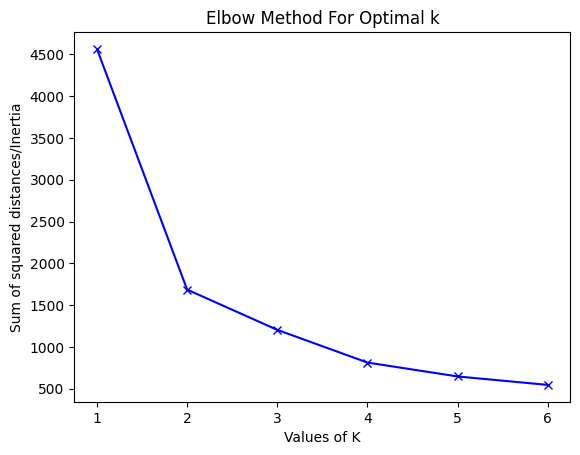

In [1677]:
# elbow analysis for optimal number of clusters
# COMPOSITION
data = concat[['50hf_ED','50hf_PD'
              #  '50f_PD', '250f_PD', '1000f_PD',
              #  '50h_PD', '250h_PD', '1000h_PD',
              #  '50u', '50f', '50s', '50h',
              #  '250u', '250s', '250f', '250h',
              #  '1000u', '1000f', '1000h', '1000s'
              ]]

Sum_of_squared_distances = []
K = range(1,7)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(data)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [1678]:
# Silhouette score to find optimal number of clusters

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Using data defined in elbow score (2500m buffer values)
# Initialize a list to store silhouette scores
silhouette_scores = []

# Range of k values to try
k_values = range(2, 6)  # Try k values from 2 to 6

# Iterate through each k value
for k in k_values:
    # Initialize and fit KMeans clustering model
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data)

    # Compute silhouette score
    silhouette_avg = silhouette_score(data, kmeans.labels_)

    # Append silhouette score to list
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters (k) that maximizes the silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]
max_silhouette_score = max(silhouette_scores)

print(f"Optimal number of clusters (k): {optimal_k}")
print(f"Max silhouette score: {max_silhouette_score}")

print(f'silhouette scores: {silhouette_scores}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Optimal number of clusters (k): 2
Max silhouette score: 0.5871737682110725
silhouette scores: [0.5871737682110725, 0.5633436214800017, 0.51836964262252, 0.5115974703156911]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

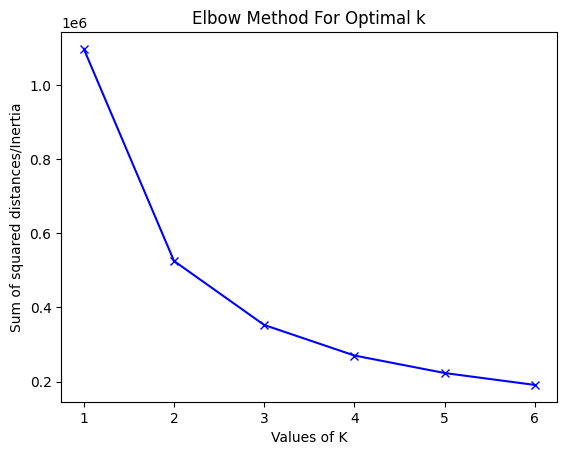

In [1679]:
# elbow analysis for optimal number of clusters

# COMPOSITION
data = concat[[
    # '50u','50f','50s','50h',
              #  '250u', '250s', '250f', '250h',
               '1000u','1000f','1000h','1000s'
               ]]

Sum_of_squared_distances = []
K = range(1,7)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(data)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [1680]:
# Silhouette score to find optimal number of clusters

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Using data defined in elbow score (2500m buffer values)
# Initialize a list to store silhouette scores
silhouette_scores = []

# Range of k values to try
k_values = range(2, 5)  # Try k values from 2 to 10

# Iterate through each k value
for k in k_values:
    # Initialize and fit KMeans clustering model
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data)

    # Compute silhouette score
    silhouette_avg = silhouette_score(data, kmeans.labels_)

    # Append silhouette score to list
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters (k) that maximizes the silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]
max_silhouette_score = max(silhouette_scores)

print(f"Optimal number of clusters (k): {optimal_k}")
print(f"Max silhouette score: {max_silhouette_score}")

print(f'silhouette scores: {silhouette_scores}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Optimal number of clusters (k): 2
Max silhouette score: 0.5132490823835393
silhouette scores: [0.5132490823835393, 0.3693446683004743, 0.39297919067116005]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## k-means clustering

### composition clusters

In [1681]:
# choose n of k-means clusters
k = 2

test hf pour composition

In [1808]:
concat['50hf'] = concat['50f']+concat['50h']
concat['250hf'] = concat['250f']+concat['250h']
concat['1000hf'] = concat['1000f']+concat['1000h']

**Buffer 50m**

In [1682]:
# Extract the data for clustering at buffer 50
data = concat[['50u', '50s', '50f', '50h']]

# KMeans model
kmeans_model = KMeans(n_clusters=k, random_state=555)
concat['c50'] = kmeans_model.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [1683]:
# Calculate centroids for column '50u' for each cluster
centroids = concat.groupby('c50')['50u'].mean()

# Check if centroid of cluster 0 is higher than centroid of cluster 1
if centroids[0] > centroids[1]:
    # Invert cluster labels
    concat['c50'] = 1 - concat['c50']

    # Recalculate centroids after inversion
    centroids = concat.groupby('c50')['50u'].mean()

    # Ensure the centroid of cluster 0 is now lower than centroid of cluster 1
    assert centroids[0] < centroids[1]

In [1684]:
concat.groupby('c50')['50u'].mean()

c50
0    44.915130
1    83.520567
Name: 50u, dtype: float64

In [1685]:
centroids50 = pd.DataFrame(kmeans_model.cluster_centers_, columns=['50u','50s','50f','50h'])

In [1686]:
centroids50 = centroids50.sort_values('50u', ascending=True).reset_index(drop=True)
centroids50

,50u,50s,50f,50h
0,44.915130,15.865566,17.033956,21.089131
1,83.520567,10.730465,0.956632,3.345477


In [1687]:
concat['c50'].value_counts()

1    1813
0     469
Name: c50, dtype: int64

**Buffer 250m**

In [1688]:
concat[['250u', '250s', '250f', '250h', '250w']].isna().any()


250u    False
250s    False
250f    False
250h    False
250w    False
dtype: bool

In [1689]:
# Extract the data for clustering at buffer 250
data = concat[['250u', '250s', '250f', '250h']]

# KMeans model
kmeans_model = KMeans(n_clusters=k, random_state=555)
concat['c250'] = kmeans_model.fit_predict(data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [1690]:
# Calculate centroids for column '250u' for each cluster
centroids = concat.groupby('c250')['250u'].mean()

# Check if centroid of cluster 0 is higher than centroid of cluster 1
if centroids[0] > centroids[1]:
    # Invert cluster labels
    concat['c250'] = 1 - concat['c250']

    # Recalculate centroids after inversion
    centroids = concat.groupby('c250')['250u'].mean()

    # Ensure the centroid of cluster 0 is now lower than centroid of cluster 1
    assert centroids[0] < centroids[1]

In [1691]:
concat.groupby('c250')['250u'].mean()

c250
0    41.251551
1    76.485533
Name: 250u, dtype: float64

In [1692]:
centroids250 = pd.DataFrame(kmeans_model.cluster_centers_, columns=['250u','250s','250f','250h'])

In [1693]:
centroids250 = centroids250.sort_values('250u', ascending=True).reset_index(drop=True)
centroids250

,250u,250s,250f,250h
0,41.251551,9.897110,24.806522,22.179646
1,76.485533,11.673191,2.579637,7.376277


In [1694]:
concat['c250'].value_counts()

1    1651
0     631
Name: c250, dtype: int64

**Buffer 1000m**

In [1695]:
# Extract the data for clustering 1000
data = concat[['1000u', '1000s', '1000f', '1000h']]

# KMeans model
kmeans_model = KMeans(n_clusters=k, random_state=555)
concat['c1000'] = kmeans_model.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [1696]:
# Calculate centroids for column '1000u' for each cluster
centroids = concat.groupby('c1000')['1000u'].mean()

# Check if centroid of cluster 0 is higher than centroid of cluster 1
if centroids[0] > centroids[1]:
    # Invert cluster labels
    concat['c1000'] = 1 - concat['c1000']

    # Recalculate centroids after inversion
    centroids = concat.groupby('c1000')['1000u'].mean()

    # Ensure the centroid of cluster 0 is now lower than centroid of cluster 1
    assert centroids[0] < centroids[1]

In [1697]:
concat.groupby('c1000')['1000u'].mean()

c1000
0    38.884997
1    68.898281
Name: 1000u, dtype: float64

In [1698]:
centroids1000 = pd.DataFrame(kmeans_model.cluster_centers_, columns=['1000u','1000s','1000f','1000h'])

In [1699]:
centroids1000 = centroids1000.sort_values('1000u', ascending=True).reset_index(drop=True)
centroids1000

,1000u,1000s,1000f,1000h
0,38.884997,8.015444,25.680484,18.125304
1,68.898281,11.812097,5.316635,10.415477


In [1700]:
concat['c1000'].value_counts()

1    1742
0     540
Name: c1000, dtype: int64

**Buffer 2500m**

In [1701]:
# Extract the data for clustering at buffer 2500
data = concat[['2500u', '2500s', '2500f', '2500h']]

# KMeans model
kmeans_model = KMeans(n_clusters=k, random_state=555)
concat['c2500'] = kmeans_model.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [1702]:
# Calculate centroids for column '2500u' for each cluster
centroids = concat.groupby('c2500')['2500u'].mean()

# Check if centroid of cluster 0 is higher than centroid of cluster 1
if centroids[0] > centroids[1]:
    # Invert cluster labels
    concat['c2500'] = 1 - concat['c2500']

    # Recalculate centroids after inversion
    centroids = concat.groupby('c2500')['2500u'].mean()

    # Ensure the centroid of cluster 0 is now lower than centroid of cluster 1
    assert centroids[0] < centroids[1]

In [1703]:
concat.groupby('c2500')['2500u'].mean()

c2500
0    27.329240
1    58.083528
Name: 2500u, dtype: float64

In [1704]:
centroids2500 = pd.DataFrame(kmeans_model.cluster_centers_, columns=['2500u','2500s','2500f','2500h'])

In [1705]:
centroids2500 = centroids2500.sort_values('2500u', ascending=True).reset_index(drop=True)
centroids2500

,2500u,2500s,2500f,2500h
0,27.329240,6.582906,25.981959,15.010645
1,58.083528,11.332996,11.565058,12.751983


In [1706]:
concat['c2500'].value_counts()

1    2072
0     210
Name: c2500, dtype: int64

###**Distance to major road**

Attribution du cluster par rapport à la distance (m)




**Cluster**
*   0 = 0-50;
*   1 = 50-250;
*   2 = 250-1000;
*   3 = 1000 -

In [1707]:
fix = concat['distance'] > 4000

# Set the 'distance' values in the filtered rows to 40
concat.loc[fix, 'distance'] = 40

In [1805]:
# Attribution du cluster par rapport à la distance
concat['cdist'] = pd.cut(concat['distance'],
                            bins=[-float('inf'), 10, 50, 250, float('inf')],
                            labels=[1, 2, 3, 4],
                            right=False)

# on s'assure que c'est en integer
concat['cdist']=concat['cdist'].astype(int)

In [1806]:
concat['cdist'].value_counts()

3    849
4    729
2    577
1    127
Name: cdist, dtype: int64

In [1709]:
concat.columns

Index(['geometry', 'distance', 'status_binary', '50w', '50u', '50s', '50f',
       '50h', '250w', '250u', '250s', '250f', '250h', '1000w', '1000u',
       '1000s', '1000f', '1000h', '2500w', '2500u', '2500s', '2500f', '2500h',
       '50u_ED', '250u_ED', '1000u_ED', '50f_ED', '250f_ED', '1000f_ED',
       '50s_ED', '250s_ED', '1000s_ED', '50h_ED', '250h_ED', '1000h_ED',
       '50hf_ED', '250hf_ED', '1000hf_ED', '50f_PD', '250f_PD', '1000f_PD',
       '50h_PD', '250h_PD', '1000h_PD', '50hf_PD', '250hf_PD', '1000hf_PD',
       'Temp_Classes', 'c50', 'c250', 'c1000', 'c2500', 'cdist'],
      dtype='object')

### Configuration clustering

**Buffer 50m**

In [1710]:
# Extract the ED and PD data for clustering at buffer 50
data = concat[['50hf_ED','50hf_PD']]

# KMeans model
kmeans_model = KMeans(n_clusters=k, random_state=555)
concat['x50'] = kmeans_model.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [1711]:
# Calculate centroids for column '50hf_ED' for each cluster
centroids = concat.groupby('x50')['50hf_ED'].mean()

# Check if centroid of cluster 0 is higher than centroid of cluster 1
if centroids[0] > centroids[1]:
    # Invert cluster labels
    concat['x50'] = 1 - concat['x50']

    # Recalculate centroids after inversion
    centroids = concat.groupby('x50')['50hf_ED'].mean()

    # Ensure the centroid of cluster 0 is now lower than centroid of cluster 1
    assert centroids[0] < centroids[1]

In [1712]:
concat.groupby('x50')['50hf_ED'].mean()

x50
0   -0.632791
1    1.062080
Name: 50hf_ED, dtype: float64

In [1713]:
centroids = pd.DataFrame(kmeans_model.cluster_centers_, columns=['50hf_ED','50hf_PD'])

In [1714]:
centroidsx50 = centroids.sort_values('50hf_ED', ascending=True).reset_index(drop=True)
centroidsx50

,50hf_ED,50hf_PD
0,-0.630364,-0.589125
1,1.067972,0.998105


In [1715]:
concat['x50'].value_counts()

0    1430
1     852
Name: x50, dtype: int64

**Buffer 250m**

In [1716]:
# Extract the ED and PD data for clustering at buffer 250
data = concat[['250hf_ED','250hf_PD']]

# KMeans model
kmeans_model = KMeans(n_clusters=k, random_state=555)
concat['x250'] = kmeans_model.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [1717]:
# Calculate centroids for column '250hf_ED' for each cluster
centroids = concat.groupby('x250')['250hf_ED'].mean()

# Check if centroid of cluster 0 is higher than centroid of cluster 1
if centroids[0] > centroids[1]:
    # Invert cluster labels
    concat['x250'] = 1 - concat['x250']

    # Recalculate centroids after inversion
    centroids = concat.groupby('x250')['250hf_ED'].mean()

    # Ensure the centroid of cluster 0 is now lower than centroid of cluster 1
    assert centroids[0] < centroids[1]

In [1718]:
concat.groupby('x250')['250hf_ED'].mean()

x250
0   -0.610438
1    0.893903
Name: 250hf_ED, dtype: float64

In [1719]:
centroids = pd.DataFrame(kmeans_model.cluster_centers_, columns=['250hf_ED','250hf_PD'])

In [1720]:
centroidsx250 = centroids.sort_values('250hf_ED', ascending=True).reset_index(drop=True)
centroidsx250

,250hf_ED,250hf_PD
0,-0.610438,-0.594430
1,0.893903,0.870461


In [1721]:
concat['x250'].value_counts()

0    1356
1     926
Name: x250, dtype: int64

**Buffer 1000m**

In [1722]:
# Extract the ED and PD data for clustering at buffer 1000
data = concat[['1000hf_ED','1000hf_PD']]

# KMeans model
kmeans_model = KMeans(n_clusters=k, random_state=555)
concat['x1000'] = kmeans_model.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [1723]:
# Calculate centroids for column '1000hf_ED' for each cluster
centroids = concat.groupby('x1000')['1000hf_ED'].mean()

# Check if centroid of cluster 0 is higher than centroid of cluster 1
if centroids[0] > centroids[1]:
    # Invert cluster labels
    concat['x1000'] = 1 - concat['x1000']

    # Recalculate centroids after inversion
    centroids = concat.groupby('x1000')['1000hf_ED'].mean()

    # Ensure the centroid of cluster 0 is now lower than centroid of cluster 1
    assert centroids[0] < centroids[1]

In [1724]:
concat.groupby('x1000')['1000hf_ED'].mean()

x1000
0   -0.699432
1    0.721853
Name: 1000hf_ED, dtype: float64

In [1725]:
# calculating kmeans centroids
centroids = pd.DataFrame(kmeans_model.cluster_centers_, columns=['1000hf_ED','1000hf_PD'])

In [1726]:
centroidsx1000 = centroids.sort_values('1000hf_ED', ascending=True).reset_index(drop=True)
centroidsx1000

,1000hf_ED,1000hf_PD
0,-0.699432,-0.785287
1,0.721853,0.810461


In [1727]:
concat['x1000'].value_counts()

0    1159
1    1123
Name: x1000, dtype: int64

### CxC clustering

Cluster z
* 1 : Low fragmentation and low urban density (e.g. parks)
* 2 : High fragmentation and low urban density (e.g. spreaded trees)
* 3 : Low fragmentation and high urban density (e.g. downtown)
* 4 : High fragmentation and high urban density (e.g. residential neighborhood)

**Hypothesis**

Weak rate in this order: 1,2,4,3

In [1728]:
concat['c50'].value_counts()

1    1813
0     469
Name: c50, dtype: int64

In [1729]:
concat['x50'].value_counts()

0    1430
1     852
Name: x50, dtype: int64

In [1730]:
# create 'z50' column
concat['z50'] = 0

# loc method to assigne 'z50' values
concat.loc[(concat['c50'] == 0) & (concat['x50'] == 0), 'z50'] = 1
concat.loc[(concat['c50'] == 0) & (concat['x50'] == 1), 'z50'] = 2
concat.loc[(concat['c50'] == 1) & (concat['x50'] == 0), 'z50'] = 3
concat.loc[(concat['c50'] == 1) & (concat['x50'] == 1), 'z50'] = 4

In [1731]:
concat['z50'].value_counts()

3    1347
4     466
2     386
1      83
Name: z50, dtype: int64

In [1732]:
concat['c250'].value_counts()

1    1651
0     631
Name: c250, dtype: int64

In [1733]:
concat['x250'].value_counts()

0    1356
1     926
Name: x250, dtype: int64

In [1734]:
# create 'z250' column
concat['z250'] = 0

# loc method to assigne 'z50' values
concat.loc[(concat['c250'] == 0) & (concat['x250'] == 0), 'z250'] = 1
concat.loc[(concat['c250'] == 0) & (concat['x250'] == 1), 'z250'] = 2
concat.loc[(concat['c250'] == 1) & (concat['x250'] == 0), 'z250'] = 3
concat.loc[(concat['c250'] == 1) & (concat['x250'] == 1), 'z250'] = 4

In [1735]:
concat['z250'].value_counts()

3    1121
4     530
2     396
1     235
Name: z250, dtype: int64

In [1736]:
concat['c1000'].value_counts()

1    1742
0     540
Name: c1000, dtype: int64

In [1737]:
concat['x1000'].value_counts()

0    1159
1    1123
Name: x1000, dtype: int64

In [1738]:
# create 'z1000' column
concat['z1000'] = 0

# loc method to assigne 'z50' values
concat.loc[(concat['c1000'] == 0) & (concat['x1000'] == 0), 'z1000'] = 1
concat.loc[(concat['c1000'] == 0) & (concat['x1000'] == 1), 'z1000'] = 2
concat.loc[(concat['c1000'] == 1) & (concat['x1000'] == 0), 'z1000'] = 3
concat.loc[(concat['c1000'] == 1) & (concat['x1000'] == 1), 'z1000'] = 4

In [1739]:
concat['z1000'].value_counts()

3    937
4    805
2    318
1    222
Name: z1000, dtype: int64

## Folium map of cluster points

In [1740]:
# import folium
# from folium.plugins import MarkerCluster
# from IPython.display import display

# # reprojecting the gdf to standard wgs 84
# gdf2 = concatenated_gdf.to_crs(epsg=4326)

# # Create a color map for the cluster values
# color_dict = {
#     0: 'blue',
#     1: 'green',
#     2: 'orange',
#     3: 'red'
# }
# # get mean coordinates of the points
# mean_coords = [gdf2.geometry.y.mean(), gdf2.geometry.x.mean()]

# # folium map with mapbox satellite background
# mymap = folium.Map(location=mean_coords, zoom_start=10, tiles='https://api.mapbox.com/styles/v1/mapbox/satellite-streets-v11/tiles/{z}/{x}/{y}?access_token=pk.eyJ1IjoianVsdmFkIiwiYSI6ImNsOHVjajVkaDAyamkzdW5zZ2xoOWJpZnAifQ.O_b7V65Y6Myn6bTGEL8aSA', attr='Mapbox')

# # use markerclusters
# # marker_cluster = MarkerCluster().add_to(mymap)



# # add markers for first row of each 'HiveID'.
# ## Change cluster 'c250' if needed
# unique_hive_ids = set()
# for idx, row in gdf2.iterrows():
#     hive_id = row['HiveID']
#     if hive_id not in unique_hive_ids:
#         folium.Marker(
#             location=[row['geometry'].y, row['geometry'].x],
#             icon=folium.Icon(color=color_dict.get(row['c250'], 'gray')),  # Color with cluster assignation. Grey by default
#             popup=f'c250: {row["c250"]}, HiveID: {hive_id}'
#         ).add_to(mymap)
#         unique_hive_ids.add(hive_id)

In [1741]:
# Stockage du geojson d'îlots de chaleur de la Ville dans une variable "geojson_ilots"
# On peut accéder au site pour voir un aperçu textuel du GeoJSON
geojson_ilots = 'https://donnees.montreal.ca/dataset/ilots-de-chaleur/resource/5210d232-5a50-43a3-81a2-1af9a2e45190/download'

In [1742]:
# Fonction pour assigner des couleurs selon la classe de température
def temp_color(feature):
    if feature['properties']['Temp_Classes'] == 1:
        return 'green'
    elif feature['properties']['Temp_Classes'] == 2:
        return 'green'
    elif feature['properties']['Temp_Classes'] == 3:
        return 'yellow'
    elif feature['properties']['Temp_Classes'] == 4:
        return 'red'
    elif feature['properties']['Temp_Classes'] == 5:
        return 'red'

In [1743]:
# # Carto Folium des températures sur l'île de Montréal
# folium.GeoJson(geojson_ilots,
#                tooltip=folium.GeoJsonTooltip(fields=['Temp_Classes']),
#                style_function= lambda feature: {'fillColor':temp_color(feature),
#                                                 'fillOpacity':0.9, 'weight':0}
#               ).add_to(mymap)

In [1744]:
# # Cartographie interactive des emplacements des ruches sur les polygones de température au sol
# mymap

In [1745]:
#pip install urllib3

#Analyses

## Cluster group % of weak

Cluster z
* 1 : Low fragmentation and low urban density (e.g. parks)
* 2 : High fragmentation and low urban density (e.g. spreaded trees)
* 3 : Low fragmentation and high urban density (e.g. downtown)
* 4 : High fragmentation and high urban density (e.g. residential neighborhood)

**Hypothesis**

Weak rate in this order: 1,2,4,3

**buffer 50m**

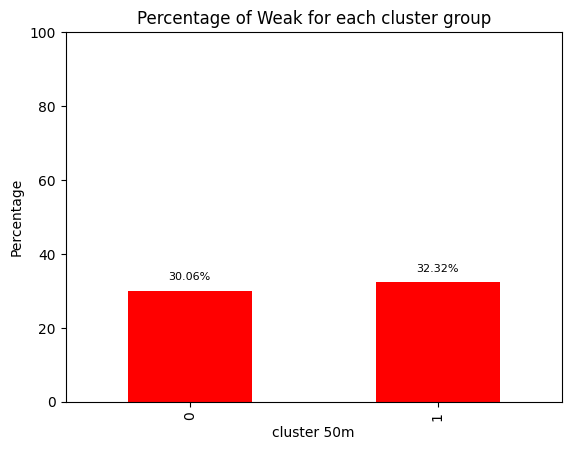

In [1746]:
percentage_dead = concat.groupby('c50')['status_binary'].apply(lambda x: (x == 0).mean() * 100)

# Plot the bar graph
ax = percentage_dead.plot(kind='bar', color='red')

# Add y-values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

# Customize the plot
plt.title('Percentage of Weak for each cluster group')
plt.xlabel('cluster 50m')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Set y-axis limit to 0-100 for percentages

# Display the plot
plt.show()

In [1747]:
centroids50

,50u,50s,50f,50h
0,44.915130,15.865566,17.033956,21.089131
1,83.520567,10.730465,0.956632,3.345477


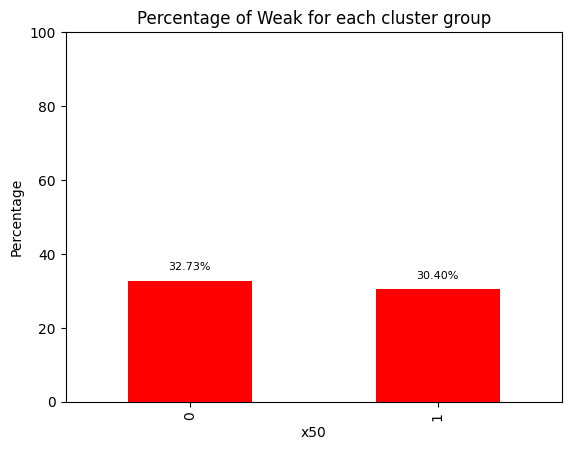

In [1748]:
percentage_dead = concat.groupby('x50')['status_binary'].apply(lambda x: (x == 0).mean() * 100)

# Plot the bar graph
ax = percentage_dead.plot(kind='bar', color='red')

# Add y-values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

# Customize the plot
plt.title('Percentage of Weak for each cluster group')
plt.xlabel('x50')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Set y-axis limit to 0-100 for percentages

# Display the plot
plt.show()

In [1749]:
centroidsx50

,50hf_ED,50hf_PD
0,-0.630364,-0.589125
1,1.067972,0.998105


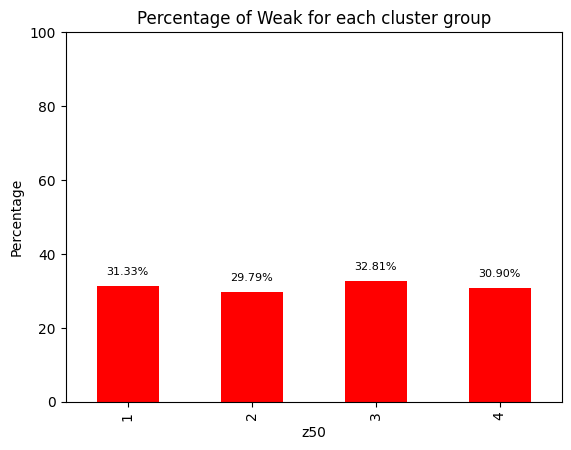

In [1750]:
percentage_dead = concat.groupby('z50')['status_binary'].apply(lambda x: (x == 0).mean() * 100)

# Plot the bar graph
ax = percentage_dead.plot(kind='bar', color='red')

# Add y-values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

# Customize the plot
plt.title('Percentage of Weak for each cluster group')
plt.xlabel('z50')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Set y-axis limit to 0-100 for percentages

# Display the plot
plt.show()

In [1751]:
concat['z50'].value_counts()

3    1347
4     466
2     386
1      83
Name: z50, dtype: int64

**buffer 250m**

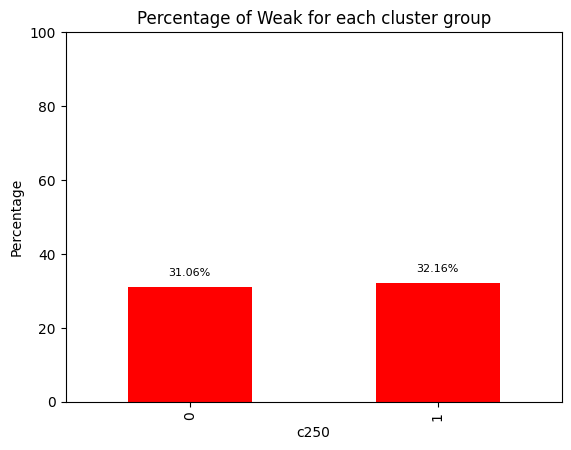

In [1752]:
percentage_dead = concat.groupby('c250')['status_binary'].apply(lambda x: (x == 0).mean() * 100)

# Plot the bar graph
ax = percentage_dead.plot(kind='bar', color='red')

# Add y-values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

# Customize the plot
plt.title('Percentage of Weak for each cluster group')
plt.xlabel('c250')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Set y-axis limit to 0-100 for percentages

# Display the plot
plt.show()

In [1753]:
centroids250

,250u,250s,250f,250h
0,41.251551,9.897110,24.806522,22.179646
1,76.485533,11.673191,2.579637,7.376277


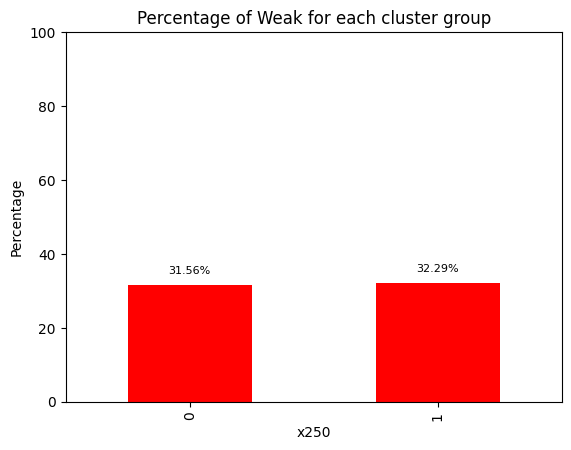

In [1754]:
percentage_dead = concat.groupby('x250')['status_binary'].apply(lambda x: (x == 0).mean() * 100)

# Plot the bar graph
ax = percentage_dead.plot(kind='bar', color='red')

# Add y-values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

# Customize the plot
plt.title('Percentage of Weak for each cluster group')
plt.xlabel('x250')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Set y-axis limit to 0-100 for percentages

# Display the plot
plt.show()

In [1755]:
centroidsx250

,250hf_ED,250hf_PD
0,-0.610438,-0.594430
1,0.893903,0.870461


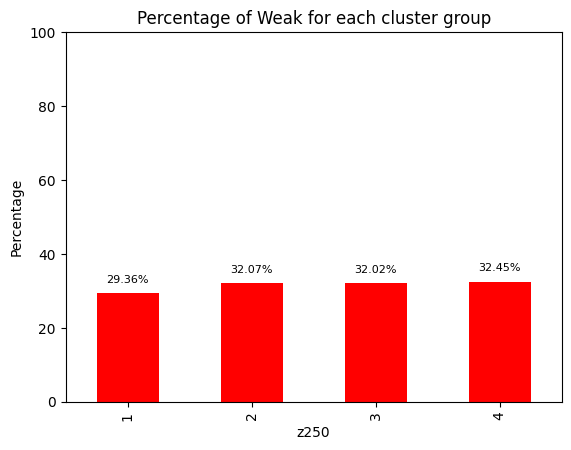

In [1756]:
percentage_dead = concat.groupby('z250')['status_binary'].apply(lambda x: (x == 0).mean() * 100)

# Plot the bar graph
ax = percentage_dead.plot(kind='bar', color='red')

# Add y-values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

# Customize the plot
plt.title('Percentage of Weak for each cluster group')
plt.xlabel('z250')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Set y-axis limit to 0-100 for percentages

# Display the plot
plt.show()

**buffer 1000m**

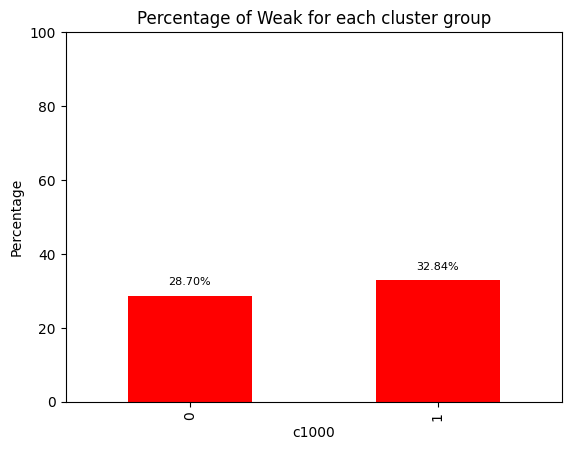

In [1757]:
percentage_dead = concat.groupby('c1000')['status_binary'].apply(lambda x: (x == 0).mean() * 100)

# Plot the bar graph
ax = percentage_dead.plot(kind='bar', color='red')

# Add y-values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

# Customize the plot
plt.title('Percentage of Weak for each cluster group')
plt.xlabel('c1000')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Set y-axis limit to 0-100 for percentages

# Display the plot
plt.show()

In [1758]:
centroids1000

,1000u,1000s,1000f,1000h
0,38.884997,8.015444,25.680484,18.125304
1,68.898281,11.812097,5.316635,10.415477


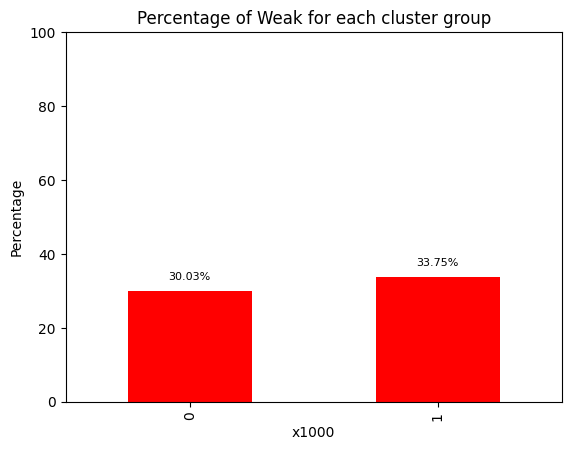

In [1759]:
percentage_dead = concat.groupby('x1000')['status_binary'].apply(lambda x: (x == 0).mean() * 100)

# Plot the bar graph
ax = percentage_dead.plot(kind='bar', color='red')

# Add y-values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

# Customize the plot
plt.title('Percentage of Weak for each cluster group')
plt.xlabel('x1000')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Set y-axis limit to 0-100 for percentages

# Display the plot
plt.show()

In [1760]:
centroidsx1000

,1000hf_ED,1000hf_PD
0,-0.699432,-0.785287
1,0.721853,0.810461


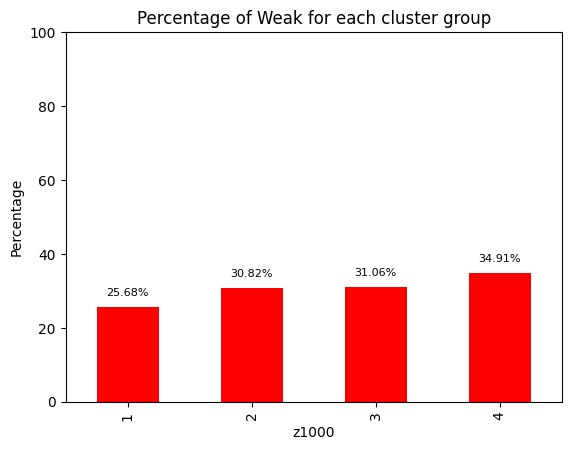

In [1761]:
percentage_dead = concat.groupby('z1000')['status_binary'].apply(lambda x: (x == 0).mean() * 100)

# Plot the bar graph
ax = percentage_dead.plot(kind='bar', color='red')

# Add y-values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

# Customize the plot
plt.title('Percentage of Weak for each cluster group')
plt.xlabel('z1000')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Set y-axis limit to 0-100 for percentages

# Display the plot
plt.show()

**buffer 2500m**

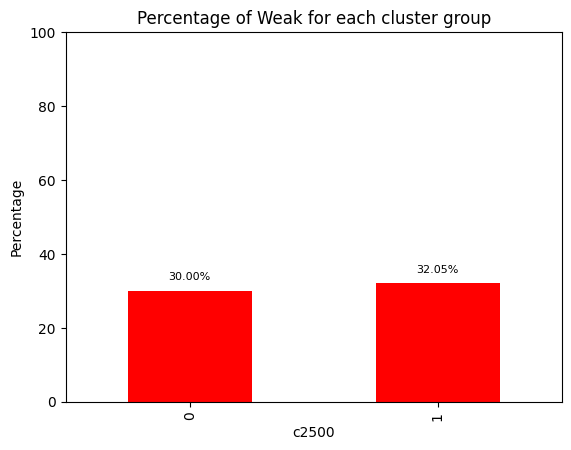

In [1762]:
percentage_dead = concat.groupby('c2500')['status_binary'].apply(lambda x: (x == 0).mean() * 100)

# Plot the bar graph
ax = percentage_dead.plot(kind='bar', color='red')

# Add y-values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

# Customize the plot
plt.title('Percentage of Weak for each cluster group')
plt.xlabel('c2500')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Set y-axis limit to 0-100 for percentages

# Display the plot
plt.show()

In [1763]:
centroids2500

,2500u,2500s,2500f,2500h
0,27.329240,6.582906,25.981959,15.010645
1,58.083528,11.332996,11.565058,12.751983


Cdist

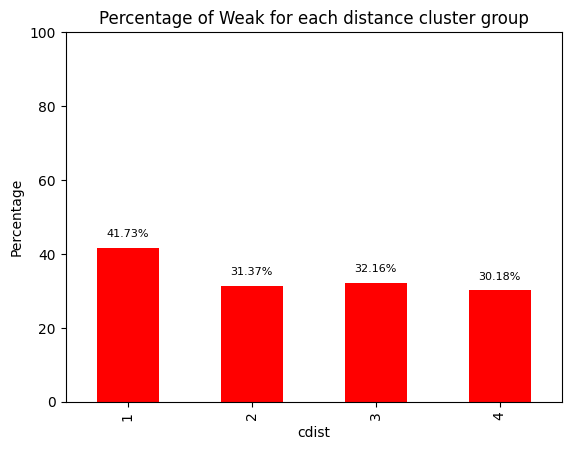

In [1807]:
# plotting data

percentage_dead = concat.groupby('cdist')['status_binary'].apply(lambda x: (x == 0).mean() * 100)

ax = percentage_dead.plot(kind='bar', color='red')

# Add y-values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

# plot display
plt.title('Percentage of Weak for each distance cluster group')
plt.xlabel('cdist')
plt.ylabel('Percentage')
plt.ylim(0, 100)

plt.show()

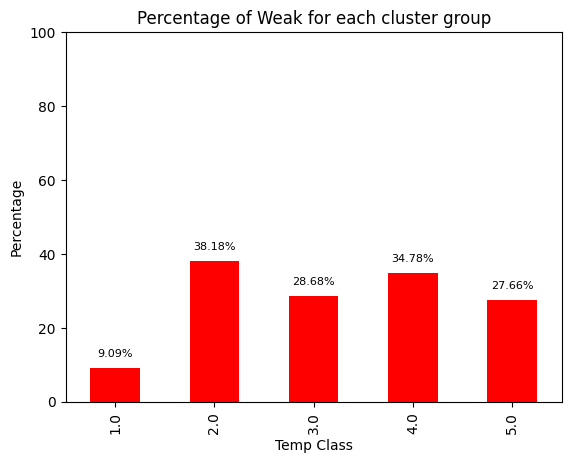

In [1765]:
# Filter concatenated_gdf to include only 'Temp_Classes' values from 1 to 5
filtered_df = concat[concat['Temp_Classes'].isin([1, 2, 3, 4, 5])]

# Calculate percentage of 'status_binary' for each 'Temp_Classes' value
percentage_dead = filtered_df.groupby('Temp_Classes')['status_binary'].apply(lambda x: (x == 0).mean() * 100)

# Plot the bar graph
ax = percentage_dead.plot(kind='bar', color='red')

# Add y-values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

# Customize the plot
plt.title('Percentage of Weak for each cluster group')
plt.xlabel('Temp Class')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Set y-axis limit to 0-100 for percentages

# Display the plot
plt.show()


### Multicollinearity assessment

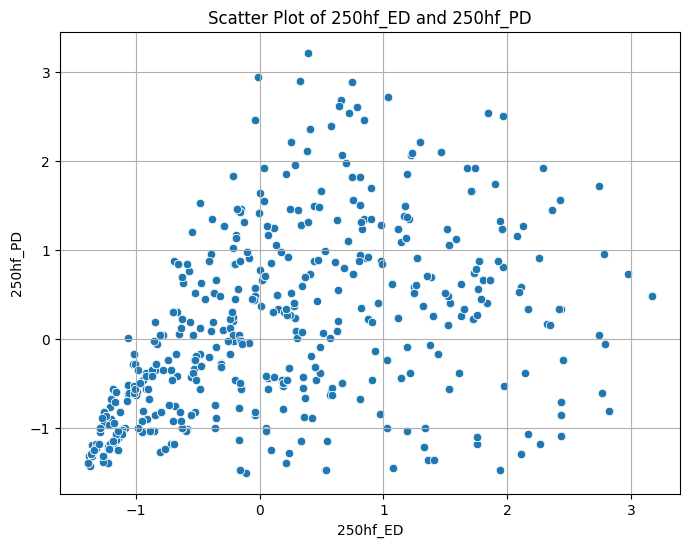

Correlation coefficient between 250hf_ED and 250hf_PD: 0.4921759778698357


In [1766]:
## Multicollinearity assessment

xx = '250hf_ED'
yy = '250hf_PD'

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=concat, x=xx, y=yy)
plt.title(f"Scatter Plot of {xx} and {yy}")
plt.xlabel(xx)
plt.ylabel(yy)
plt.grid(True)
plt.show()

# Correlation coefficient
correlation = concat[xx].corr(concat[yy])
print(f"Correlation coefficient between {xx} and {yy}: {correlation}")


In [1767]:
error

NameError: name 'error' is not defined

In [ ]:
import statsmodels.api as sm

# Define the independent variables (X) and the dependent variable (y)
X = concat[col4glm]
y = concat['status_binary']

# Add a constant to the independent variables (required for statsmodels)
X = sm.add_constant(X)

# Fit the full model
full_model = sm.Logit(y, X).fit()

# Perform stepwise regression (backward elimination)
selected_model = full_model.pvalues[1:].idxmax()
while full_model.pvalues[1:].max() > 0.05:
    X = X.drop(columns=selected_model)
    selected_model = full_model.pvalues[1:].idxmax()
    full_model = sm.Logit(y, X).fit()

# Print the summary of the selected model
print(selected_model.summary())

# Perform model selection based on information criteria (e.g., AIC)
# Note: You may need to adjust this part based on your specific needs and criteria
best_model = None
best_aic = float('inf')
for subset in powerset(col4glm):
    if len(subset) > 0:
        X_subset = concat[list(subset)]
        X_subset = sm.add_constant(X_subset)
        model = sm.Logit(y, X_subset).fit()
        if model.aic < best_aic:
            best_aic = model.aic
            best_model = model

# Print the summary of the best model based on AIC
print(best_model.summary())


**Cluster distance**

## correlation

In [ ]:
necpol = pd.concat([pol, nec], ignore_index=True)

In [ ]:
Pcol = ['50u','50s','50f','50h','250u','250s','250f','250h','2500u','2500s','2500f','2500h','distance']

In [ ]:
df = concat
y = df['status_binary']

matrix_df = df[['status_binary'] + Pcol]

# Calculate Spearman's correlation matrix
correlation_matrix = matrix_df.corr(method='spearman')

# Extract the correlation values for 'Status' column, excluding it from the plot
correlation_with_status = correlation_matrix['status_binary'].drop('status_binary')

# Plot the correlation values
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=correlation_with_status.index, y=correlation_with_status.values, palette='coolwarm')

# Add values on top of the bars
for index, value in enumerate(correlation_with_status.values):
    barplot.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.title("Dataset: Spearman's Correlation with 'status_binary'")
plt.xlabel("Columns")
plt.ylabel("Spearman's")
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

# Filter the DataFrame to include only the variables specified in allcol
df_filtered = df[Pcol + ['status_binary']]

# Calculate point-biserial correlation coefficient for each continuous predictor variable
correlation_results = {}

for col in df_filtered.columns:
    if col != 'status_binary' and df_filtered[col].dtype != 'object':
        correlation_coefficient, _ = pointbiserialr(df_filtered[col], df_filtered['status_binary'])
        correlation_results[col] = correlation_coefficient

# Convert results to DataFrame for visualization
correlation_df = pd.DataFrame.from_dict(correlation_results, orient='index', columns=['Correlation'])

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=correlation_df.index, y=correlation_df['Correlation'], palette='coolwarm')

for index, value in enumerate(correlation_df['Correlation']):
    barplot.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Plot the correlation results
plt.title('Point-Biserial Correlation with status_binary')
plt.xlabel('Predictor Variable')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

# Filter the DataFrame to include only the variables specified in allcol
df_filtered = df[Pcol + ['status_binary']]

# Calculate point-biserial correlation coefficient for each continuous predictor variable
correlation_results = {}

for col in df_filtered.columns:
    if col != 'status_binary' and df_filtered[col].dtype != 'object':
        correlation_coefficient, _ = pointbiserialr(df_filtered[col], df_filtered['status_binary'])
        correlation_results[col] = correlation_coefficient

# Convert results to DataFrame for visualization
correlation_df = pd.DataFrame.from_dict(correlation_results, orient='index', columns=['Correlation'])

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=correlation_df.index, y=correlation_df['Correlation'], palette='coolwarm')

for index, value in enumerate(correlation_df['Correlation']):
    barplot.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Plot the correlation results
plt.title('Point-Biserial Correlation with status_binary')
plt.xlabel('Predictor Variable')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming 'distance' and 'status_binary' are columns in your DataFrame dfg
distance = df['distance']
status_binary = df['status_binary']

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(distance, status_binary, color='blue', alpha=0.5)
plt.title('Scatter Plot of Distance vs. Status Binary')
plt.xlabel('Distance')
plt.ylabel('Status Binary')
plt.grid(True)
plt.show()


In [ ]:
print(centroids50)
print(centroids250)
print(centroids1000)
print(centroids2500)

## GLM

In [ ]:
concat.isna().any()

In [ ]:
concat.drop(columns={'index_right','Year'},errors='ignore',inplace=True)

In [ ]:
# columns to onehot encoded
columns_to_encode = ['z50', 'z250', 'z1000','cdist','Temp_Classes']

In [ ]:
encoded_gdf = pd.get_dummies(concat, columns=columns_to_encode)
encoded_gdf.head()

In [ ]:
encoded_gdf.isna().any()

In [ ]:
# columns for % composition, distance and edge density

col4glm = ['50u','50s','50f','50h',
           '250u','250s','250f','250h',
           '2500u','2500s','2500f','2500h',
           'distance',
           '50u_ED', '250u_ED', '1000u_ED',
           '50f_ED', '250f_ED', '1000f_ED'
           ]
df = concat

In [ ]:
col4glm = ['50u','50s','50f','50h','250u','250s','250f','250h','2500u','2500s','2500f','2500h']
df = concat

In [ ]:
# encoded columns for 4 clusters

col4glm = ['z50_1','z50_2','z50_3','z50_4',
           'z250_1','z250_2','z250_3','z250_4',
           'z1000_1','z1000_2','z1000_3','z1000_4',
           'cdist_0','cdist_1','cdist_2','cdist_3',
           'Temp_Classes_1.0','Temp_Classes_2.0',
           'Temp_Classes_3.0','Temp_Classes_4.0',
           'Temp_Classes_5.0',
           '50u','50s','50f','50h',
           '250u','250s','250f','250h',
           '2500u','2500s','2500f','2500h',
           '50hf_ED','250hf_ED','1000hf_ED',
           '50hf_PD','250hf_PD','1000hf_PD']
df = encoded_gdf

In [ ]:
# # encoded columns for 3 clusters

# col4glm = ['c50_0','c50_1','c50_2','c250_0','c250_1','c250_2','c1000_0','c1000_1','c1000_2',
#            'c2500_0','c2500_1','c2500_2','cdist_0','cdist_1','cdist_2','cdist_3']
# df = encoded_gdf

In [ ]:

# col4glm = ['50u','50s','50f','50h','250u','250s','250f','250h','2500u','2500s','2500f','2500h','distance',
#            'c50_0','c50_1','c50_2','c250_0','c250_1','c250_2','c1000_0','c1000_1','c1000_2'
#            ,'c2500_0','c2500_1','c2500_2',]
# df = encoded_gdf

In [ ]:
# # encoded columns for 3 clusters + Composition %

# col4glm = ['50u','50s','50f','50h',
#            '250u','250s','250f','250h',
#            '2500u','2500s','2500f','2500h',
#            'distance',
#            'c50_0','c50_1','c50_2',
#            'c250_0','c250_1','c250_2',
#            'c1000_0','c1000_1','c1000_2'
#            ,'c2500_0','c2500_1','c2500_2',
#            '50u_ED', '250u_ED', '1000u_ED',
#            '50f_ED', '250f_ED', '1000f_ED']
# df = encoded_gdf

In [ ]:
# col4glm = ['50u_ED', '250u_ED', '1000u_ED',
#            '50f_ED', '250f_ED', '1000f_ED'
#            ]
# df = concat

In [ ]:
# # encoded columns for 3 clusters + edge density for forest and urban

# col4glm = ['c50_0','c50_1','c50_2',
#            'c250_0','c250_1','c250_2',
#            'c1000_0','c1000_1','c1000_2',
#            'c2500_0','c2500_1','c2500_2',
#            'cdist_0','cdist_1','cdist_2','cdist_3',
#            '50u_ED', '250u_ED', '1000u_ED',
#            '50f_ED', '250f_ED', '1000f_ED'
#            ]
# df = encoded_gdf

In [ ]:
# df['status_binary'].value_counts()

In [ ]:
encoded_gdf.columns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report

# x and y data
X = df[col4glm]
y = df['status_binary']

# splitting data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.1,
    random_state=1)

# Create a logistic regression model with cross-validation
model = LogisticRegressionCV(
    cv=5, class_weight='balanced',
    max_iter=1000,
    random_state=15550)

# model fit
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model with scaler

# Extract the list of percentage variables
X = df[col4glm]
y = df['status_binary']

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create a StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression(
    C=0.01,
    class_weight='balanced',
    max_iter=10000,
    random_state=1,
    )

# Train the model on the scaled data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)

# Assess the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


# Display the performance metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


In [ ]:
import statsmodels.api as sm

# Define the independent variables (X) and the dependent variable (y)
X = df[col4glm]
y = df['status_binary']

# Add a constant to the independent variables (required for statsmodels)
X = sm.add_constant(X)

# Fit the full model
full_model = sm.Logit(y, X).fit()

# Perform stepwise regression (backward elimination)
selected_model = full_model.pvalues[1:].idxmax()
while full_model.pvalues[1:].max() > 0.05:
    X = X.drop(columns=selected_model)
    selected_model = full_model.pvalues[1:].idxmax()
    full_model = sm.Logit(y, X).fit()

# Print the summary of the selected model
print(selected_model.summary())

# Perform model selection based on information criteria (e.g., AIC)
# Note: You may need to adjust this part based on your specific needs and criteria
best_model = None
best_aic = float('inf')
for subset in powerset(col4glm):
    if len(subset) > 0:
        X_subset = concat[list(subset)]
        X_subset = sm.add_constant(X_subset)
        model = sm.Logit(y, X_subset).fit()
        if model.aic < best_aic:
            best_aic = model.aic
            best_model = model

# Print the summary of the best model based on AIC
print(best_model.summary())


In [ ]:
import pandas as pd

# Assuming 'concat' is your DataFrame
data_types = df.dtypes

# Print data types of all columns
print(data_types)

# Check data type of a specific column, for example, 'z50_3'
print("Data type of 'z50_3' column:", data_types['z50_3'])


In [ ]:
import statsmodels.api as sm
# x and y data
X = df[col4glm]
y = df['status_binary']

# splitting data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.1,

    random_state=1)


#Create a StandardScaler
scaler = StandardScaler()

#Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)
# X_train_scaled = X_train
# X_test_scaled = X_test

# Add a constant to the X variables
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

# Fit a GLM
glm_model = sm.GLM(y_train, X_train_scaled, family=sm.families.Binomial())
glm_results = glm_model.fit()

# Print summary of the GLM results

# Get the names of the predictor variables
predictor_names = ['Intercept'] + list(X.columns)  # Assuming X is your DataFrame of predictor variables

# Create a DataFrame to store the coefficient names and values
coef_summary = pd.DataFrame({
    'Predictor': predictor_names,
    'Coefficient': glm_results.params.values
})

print(glm_results.summary())
# Print the summary with predictor names
print(coef_summary)


In [ ]:
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame containing the variables 'status_binary' and the predictors in col4glm

# x and y data
X = df[col4glm]
y = df['status_binary']

# splitting data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=1
)

# Create a StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Add a constant to the X variables
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

# Fit a GLMM (assuming no random effects)
glmm_model = sm.GLM(y_train, X_train_scaled, family=sm.families.Binomial())
glmm_results = glmm_model.fit()

# Print summary of the GLMM results
print(glmm_results.summary())


In [ ]:
import seaborn as sns
import pandas as pd

# Create a scatter plot with a regression line and confidence interval
sns.regplot(x='250f_ED', y='status_binary', data=df, logistic=True, scatter_kws={"s": 10})

# Add labels and title
plt.xlabel('1000f_ED')
plt.ylabel('Status Binary')
plt.title('Scatter Plot with Logistic Regression Line')

# Show the plot
plt.show()

In [ ]:
import seaborn as sns
import pandas as pd

# Create a scatter plot with a regression line and confidence interval
sns.regplot(x='1000f_ED', y='status_binary', data=df, logistic=True, scatter_kws={"s": 10})

# Add labels and title
plt.xlabel('1000f_ED')
plt.ylabel('Status Binary')
plt.title('Scatter Plot with Logistic Regression Line')

# Show the plot
plt.show()


In [ ]:
# Calculate residuals
residuals = glm_results.resid_response

# Calculate fitted values
fitted_values = glm_results.fittedvalues

# Create a scatter plot of residuals vs. fitted values
plt.scatter(fitted_values, residuals, alpha=0.5)

# Add a horizontal line at y = 0 for reference
plt.axhline(y=0, color='gray', linestyle='--')

# Add labels and title
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Show the plot
plt.show()

# Print summary of the GLM results
print(glm_results.summary())

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already obtained the coefficients from glm_results
coef_values = glm_results.params.values[1:]  # Exclude the intercept
predictor_names = list(X.columns)  # Assuming X is your DataFrame of predictor variables

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(predictor_names, coef_values, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Predictor Variable')
plt.title('Coefficients of Predictor Variables')
plt.show()


In [ ]:
coefficients = model.coef_[0]
feature_names = X.columns

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.title('Logistic Regression Coefficients')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Get the coefficients, standard errors, and p-values
coefficients = model.coef_[0]
std_errors = np.sqrt(np.diag(model.score(X_train, y_train) * np.linalg.inv(np.dot(X_train.T, X_train))))
p_values = 2 * (1 - norm.cdf(np.abs(coefficients / std_errors)))

# Calculate the odds ratios
odds_ratios = np.exp(coefficients)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': coefficients,
    'Standard Error': std_errors,
    'P-value': p_values,
    'Odds Ratio': odds_ratios
})

# Display the results
print(results_df)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for grid search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}  # Adjust the values as needed

# Create a logistic regression model
logistic_regression = LogisticRegression(max_iter=10000, random_state=1)

# Perform grid search with cross-validation
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameter value
best_C = grid_search.best_params_['C']

# Create a logistic regression model with the best C value
model = LogisticRegression(C=best_C, max_iter=10000, random_state=1)

# Fit the model to the training data
model.fit(X_train, y_train)


# Tests section

In [ ]:
# import os

# os.chdir('/content')
# # Convert 'report_submitted_at' column to string
# concatenated_gdf['report_submitted_at'] = concatenated_gdf['report_submitted_at'].astype(str)

# # # Write the GeoDataFrame to a GeoJSON file
# concatenated_gdf.to_file('gdf_13_02_2020.geojson', driver='GeoJSON')

In [ ]:
alv['status_binary'].value_counts()
# alv2020['status_binary'].value_counts()

In [ ]:
Pcol = ['50u','50s','50f','50h','250u','250s','250f','250h','2500u','2500s','2500f','2500h','distance']

In [ ]:
concat.columns

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'alv' is your DataFrame

# Plot the values of the '250u' column on the x-axis and '250u_ED' column on the y-axis
plt.plot(alv['250u'], alv['250u_ED'], marker='o', linestyle='', label='250u vs 250u_ED')

# Add labels and title
plt.xlabel('250u')
plt.ylabel('250u_ED')
plt.title('Scatter Plot of 250u vs 250u_ED Columns')
plt.legend()

# Show the plot
plt.show()


In [1777]:
count_distance_under_30 = len(concat[concat['distance'] < 10])

print("Number of rows with 'distance' value under 30:", count_distance_under_30)

Number of rows with 'distance' value under 30: 127


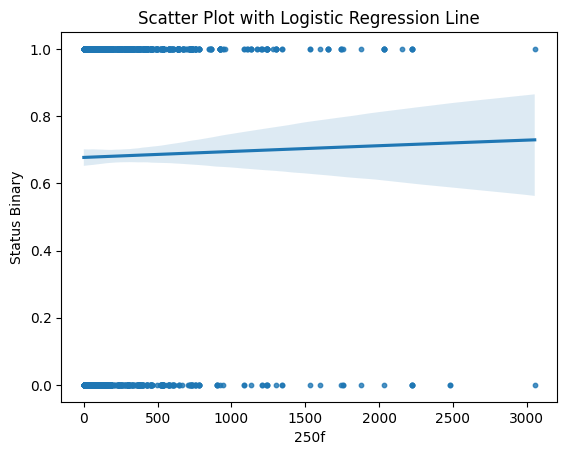

In [1771]:
import seaborn as sns
import pandas as pd

# Create a scatter plot with a regression line and confidence interval
sns.regplot(x='distance', y='status_binary', data=concat, logistic=True, scatter_kws={"s": 10})

# Add labels and title
plt.xlabel('250f')
plt.ylabel('Status Binary')
plt.title('Scatter Plot with Logistic Regression Line')

# Show the plot
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Separate features (X) and target variable (y)
X = concat.drop(['status_binary', 'geometry'], axis=1)  # Drop 'status_binary' and 'geometry' columns
y = concat['status_binary']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new dataframe with the oversampled data
oversampled_df = pd.DataFrame(X_resampled, columns=X.columns)
oversampled_df['status_binary'] = y_resampled

# Check the class distribution in the oversampled dataframe
print(oversampled_df['status_binary'].value_counts())
